# Missing Children England 2020 to 2021 - Visualisations

This uses data produced by the colab file 'Missing_Children_England_2020_2021_DATA_PREP':

- all_force_data.csv
- childrens_homes_mapped_to_forces.csv

## Import Code Libraries

In [1]:
# import
import numpy as np  # for working with numbers
import pandas as pd  # for importing, transforming and saving data
from datetime import datetime # Current date time in local system
import matplotlib.pyplot as plt
import seaborn as sns

# config
%matplotlib inline
sns.set();
sns.set_style("whitegrid", {'axes.edgecolor':'gray'})
plot_colour = "#154c79"

# view versions imported
print('numpy', np.__version__)
print('pandas', pd.__version__)
print('seaborn', sns.__version__)

numpy 1.21.6
pandas 1.3.5
seaborn 0.11.2


In [2]:
# view version of python used
!python --version

Python 3.7.13


## Import Data

### Missing children

In [3]:
missing = pd.read_csv('all_force_data.csv')

# view some summary stats and the first 2 rows of the data
print("Number of rows and columns: ", missing.shape)
print("")
print("Columns", missing.columns)
print("First few rows:")
print("")
missing.head(5)

Number of rows and columns:  (40, 26)

Columns Index(['police_force', '2015_16 children', '2016_17 children',
       '2017_18 children', '2018_19 children', '2019_20 children',
       '2020_21 children', 'num_diff_to_2019_20_children',
       'percent_diff_to_2019_20_children', 'population_incl_adults',
       'all_misper_calls_recorded', 'all_misper_call_rate_per_1000',
       '0-11yrs_percent', '12-17yrs_percent', '18-39yrs_percent',
       '40-59yrs_percent', '60+yrs_percent', 'Unknown_age_percent',
       'care_num_child_incidents', 'care_num_missing_children',
       'care_child_incident_ratio', 'not_care_num_child_incidents',
       'not_care_num_missing_children', 'not_care_child_incident_ratio',
       'care_plus_not_care_child_ttl', 'percent_care_children'],
      dtype='object')
First few rows:



police_force  2015_16 children  2016_17 children  2017_18 children  \
0  Avon and Somerset            2157.0            1737.0            1817.0   
1       Bedfordshire             421.0            1251.0             819.0   
2     Cambridgeshire             554.0             645.0             697.0   
3           Cheshire            1136.0            2131.0            1613.0   
4     City of London              14.0              14.0               8.0   

   2018_19 children  2019_20 children  2020_21 children  \
0            1557.0            1206.0             922.0   
1             843.0             763.0             602.0   
2             798.0             914.0             705.0   
3            1380.0            1610.0            2709.0   
4               7.0               9.0               1.0   

   num_diff_to_2019_20_children  percent_diff_to_2019_20_children  \
0                        -284.0                             -23.5   
1                        -161.0                             -21.1   
2                        -209.0                             -22.9   
3                        1099.0                              68.3   
4                          -8.0                             -88.9   

   population_incl_adults  ...  60+yrs_percent  Unknown_age_percent  \
0               1719000.0  ...             4.7                  0.3   
1                675000.0  ...             3.8                  0.0   
2                855800.0  ...             4.0                  0.0   
3               1066600.0  ...             NaN                  NaN   
4                  9700.0  ...             0.0                  0.0   

   care_num_child_incidents  care_num_missing_children  \
0                     936.0                      256.0   
1                     474.0                       72.0   
2                     239.0                       48.0   
3                    1369.0                      453.0   
4                       0.0                        0.0   

   care_child_incident_ratio  not_care_num_child_incidents  \
0                        3.7                        1861.0   
1                        6.6                        1241.0   
2                        5.0                        1562.0   
3                        3.0                        1928.0   
4                        0.0                           1.0   

   not_care_num_missing_children  not_care_child_incident_ratio  \
0                          909.0                            2.0   
1                          553.0                            2.2   
2                          664.0                            2.4   
3                         1206.0                            1.6   
4                            1.0                            1.0   

   care_plus_not_care_child_ttl  percent_care_children  
0                        1165.0                  21.97  
1                         625.0                  11.52  
2                         712.0                   6.74  
3                        1659.0                  27.31  
4                           1.0                   0.00  

[5 rows x 26 columns]

In [4]:
missing

police_force  2015_16 children  2016_17 children  \
0              Avon and Somerset            2157.0            1737.0   
1                   Bedfordshire             421.0            1251.0   
2                 Cambridgeshire             554.0             645.0   
3                       Cheshire            1136.0            2131.0   
4                 City of London              14.0              14.0   
5                      Cleveland               NaN            1535.0   
6                        Cumbria             876.0             806.0   
7                     Derbyshire             534.0             485.0   
8             Devon and Cornwall            1364.0            2310.0   
9                         Dorset               NaN             785.0   
10                        Durham             324.0             546.0   
11                         Essex            1399.0            2044.0   
12               Gloucestershire             442.0             466.0   
13            Greater Manchester            4379.0            4856.0   
14                     Hampshire            1879.0            2945.0   
15                 Hertfordshire             942.0            1112.0   
16                    Humberside             833.0            1414.0   
17                          Kent            2474.0            2440.0   
18                    Lancashire            1606.0            2995.0   
19                Leicestershire             747.0             932.0   
20                  Lincolnshire             256.0            1519.0   
21                    Merseyside            1905.0            2504.0   
22                  Metropolitan           13116.0           13222.0   
23                       Norfolk             552.0             954.0   
24               North Yorkshire             657.0            1097.0   
25              Northamptonshire             446.0             968.0   
26                   Northumbria            1397.0            1846.0   
27               Nottinghamshire            1023.0            2068.0   
28               South Yorkshire            1773.0            2501.0   
29                 Staffordshire             990.0            1385.0   
30                       Suffolk             642.0             850.0   
31                        Surrey             604.0             842.0   
32                        Sussex             655.0             712.0   
33                 Thames Valley            3418.0            3556.0   
34  Warwickshire and West Mercia            1342.0            1922.0   
35                 West Midlands            1850.0            1959.0   
36                West Yorkshire            2657.0            4912.0   
37                     Wiltshire             423.0             916.0   
38                  Warwickshire               NaN               NaN   
39                   West Mercia               NaN               NaN   

    2017_18 children  2018_19 children  2019_20 children  2020_21 children  \
0             1817.0            1557.0            1206.0             922.0   
1              819.0             843.0             763.0             602.0   
2              697.0             798.0             914.0             705.0   
3             1613.0            1380.0            1610.0            2709.0   
4                8.0               7.0               9.0               1.0   
5             1237.0            1205.0            1222.0             963.0   
6             1075.0            2429.0             840.0             522.0   
7              460.0             784.0             933.0             736.0   
8             1970.0            1861.0            1613.0            1272.0   
9              984.0            1087.0            1088.0             827.0   
10             423.0             647.0               NaN               NaN   
11            1840.0            1987.0            1850.0            1377.0   
12             387.0             481.0             49

### Children's homes

In [5]:
homes = pd.read_csv('childrens_homes_mapped_to_forces.csv')

# view some summary stats and the first 2 rows of the data
print("Number of rows and columns: ", homes.shape)
print("")
print("First few rows:")
print("")
homes.head(5)

Number of rows and columns:  (2962, 7)

First few rows:



police_force Local authority  Ofsted region   Provision type  \
0   Derbyshire           derby  East Midlands  children's home   
1   Derbyshire           derby  East Midlands  children's home   
2   Derbyshire           derby  East Midlands  children's home   
3   Derbyshire           derby  East Midlands  children's home   
4   Derbyshire           derby  East Midlands  children's home   

            Sector  Places Organisation which owns the provider  
0          Private     2.0                         5ab Care Ltd  
1          Private     5.0              Blue Mountain Homes Ltd  
2          Private     4.0              Blue Mountain Homes Ltd  
3          Private     4.0              Blue Mountain Homes Ltd  
4  Local Authority     5.0                   Derby City Council

In [6]:
homes['police_force'].unique()

array(['Derbyshire', 'Humberside', 'Leicestershire', 'Northamptonshire',
       'Nottinghamshire', 'Bedfordshire', 'Cambridgeshire', 'Essex',
       'Hertfordshire', 'Norfolk', 'Suffolk', 'Metropolitan Police',
       'Cleveland', 'Durham', 'North Yorkshire', 'Northumbria',
       'South Yorkshire', 'West Yorkshire', 'Cheshire', 'Cumbria',
       'Greater Manchester', 'Lancashire', 'Merseyside', 'Hampshire',
       'Kent', 'Surrey', 'Sussex', 'Thames Valley', 'Avon and Somerset',
       'Devon & Cornwall', 'Dorset', 'Wiltshire', 'Staffordshire',
       'Warwickshire', 'West Mercia', 'West Midlands'], dtype=object)

In [7]:
# change 'Devon & Cornwall' to 'Devon and Cornwall' 
# and 'Metropolitan Police' to 'Metropolitan' so name matches other data
homes.loc[homes['police_force']=='Devon & Cornwall', 'police_force']='Devon and Cornwall'
homes.loc[homes['police_force']=='Metropolitan Police', 'police_force']='Metropolitan'
homes['police_force'].unique()

array(['Derbyshire', 'Humberside', 'Leicestershire', 'Northamptonshire',
       'Nottinghamshire', 'Bedfordshire', 'Cambridgeshire', 'Essex',
       'Hertfordshire', 'Norfolk', 'Suffolk', 'Metropolitan', 'Cleveland',
       'Durham', 'North Yorkshire', 'Northumbria', 'South Yorkshire',
       'West Yorkshire', 'Cheshire', 'Cumbria', 'Greater Manchester',
       'Lancashire', 'Merseyside', 'Hampshire', 'Kent', 'Surrey',
       'Sussex', 'Thames Valley', 'Avon and Somerset',
       'Devon and Cornwall', 'Dorset', 'Wiltshire', 'Staffordshire',
       'Warwickshire', 'West Mercia', 'West Midlands'], dtype=object)

## Total for 2020 to 2021 (missing children)

In [8]:
# create column showing number of children recorded missing 2020-21 
# as a percentage of the force area population
missing['miss_chil_as_percent_pop'] = round((missing['2020_21 children'] / missing['population_incl_adults'])*100, 2)
missing.head(3)

police_force  2015_16 children  2016_17 children  2017_18 children  \
0  Avon and Somerset            2157.0            1737.0            1817.0   
1       Bedfordshire             421.0            1251.0             819.0   
2     Cambridgeshire             554.0             645.0             697.0   

   2018_19 children  2019_20 children  2020_21 children  \
0            1557.0            1206.0             922.0   
1             843.0             763.0             602.0   
2             798.0             914.0             705.0   

   num_diff_to_2019_20_children  percent_diff_to_2019_20_children  \
0                        -284.0                             -23.5   
1                        -161.0                             -21.1   
2                        -209.0                             -22.9   

   population_incl_adults  ...  Unknown_age_percent  care_num_child_incidents  \
0               1719000.0  ...                  0.3                     936.0   
1                675000.0  ...                  0.0                     474.0   
2                855800.0  ...                  0.0                     239.0   

   care_num_missing_children  care_child_incident_ratio  \
0                      256.0                        3.7   
1                       72.0                        6.6   
2                       48.0                        5.0   

   not_care_num_child_incidents  not_care_num_missing_children  \
0                        1861.0                          909.0   
1                        1241.0                          553.0   
2                        1562.0                          664.0   

   not_care_child_incident_ratio  care_plus_not_care_child_ttl  \
0                            2.0                        1165.0   
1                            2.2                         625.0   
2                            2.4                         712.0   

   percent_care_children  miss_chil_as_percent_pop  
0                  21.97                      0.05  
1                  11.52                      0.09  
2                   6.74                      0.08  

[3 rows x 27 columns]

In [9]:
# create a dataframe showing num children missing in 2020-21,
# the force area population,
# and the figure as a percentage of the force area's population
num_miss_chil_and_pop_prop = missing[['police_force', 
                                      '2020_21 children',
                                      'population_incl_adults', 
                                      'miss_chil_as_percent_pop']]

num_miss_chil_and_pop_prop = num_miss_chil_and_pop_prop.set_index('police_force')
num_miss_chil_and_pop_prop = num_miss_chil_and_pop_prop.sort_values(by='miss_chil_as_percent_pop', ascending=False)
num_miss_chil_and_pop_prop

2020_21 children  population_incl_adults  \
police_force                                                             
Cheshire                                2709.0               1066600.0   
Cleveland                                963.0                569100.0   
Nottinghamshire                         1578.0               1161100.0   
Greater Manchester                      4073.0               2835700.0   
Northumbria                             1974.0               1463900.0   
Dorset                                   827.0                773800.0   
Humberside                               949.0                932800.0   
Hampshire                               1982.0               1991700.0   
Kent                                    1818.0               1860100.0   
Cumbria                                  522.0                500000.0   
West Yorkshire                          2438.0               2332500.0   
West Midlands                           2595.0               2928600.0   
Thames Valley                           2141.0               2420000.0   
Bedfordshire                             602.0                675000.0   
Northamptonshire                         654.0                753300.0   
Suffolk                                  579.0                761400.0   
Cambridgeshire                           705.0                855800.0   
Metropolitan                            7009.0               8952300.0   
Norfolk                                  632.0                907800.0   
Hertfordshire                            875.0               1189500.0   
Leicestershire                           785.0               1100300.0   
Essex                                   1377.0               1846700.0   
Devon and Cornwall                      1272.0               1772500.0   
Derbyshire                               736.0               1060000.0   
Sussex                                  1241.0               1712100.0   
North Yorkshire                          512.0                828700.0   
Lincolnshire                             449.0                761200.0   
Avon and Somerset                        922.0               1719000.0   
Wiltshire                                376.0                722200.0   
Surrey                                   465.0               1196200.0   
City of London                             1.0                  9700.0   
Durham                                     NaN                636900.0   
Gloucestershire                            NaN                637100.0   
Lancashire                                 NaN               1508900.0   
Merseyside                                 NaN               1429900.0   
South Yorkshire                            NaN               1409000.0   
Staffordshire                              NaN               1135900.0   
Warwickshire and West Mercia            1091.0                     NaN   
Warwickshire                               NaN                577900.0   
West Mercia                                NaN               1291600.0   

                              miss_chil_as_percent_pop  
police_force                                            
Cheshire                                          0.25  
Cleveland                                         0.17  
Nottinghamshire                                   0.14  
Greater Manchester                                0.14  
Northumbria                                       0.13  
Dorset                                            0.11  
Humberside                                        0.10  
Hampshire                                         0.10  
Kent                                              0.10  
Cumbria                                           0.10  
West Yorkshire                                    0.10  
West Midlands                                     0.09  
Thames Valley                                     0.09  
Bedfordshire                                      0.09  
Northampt

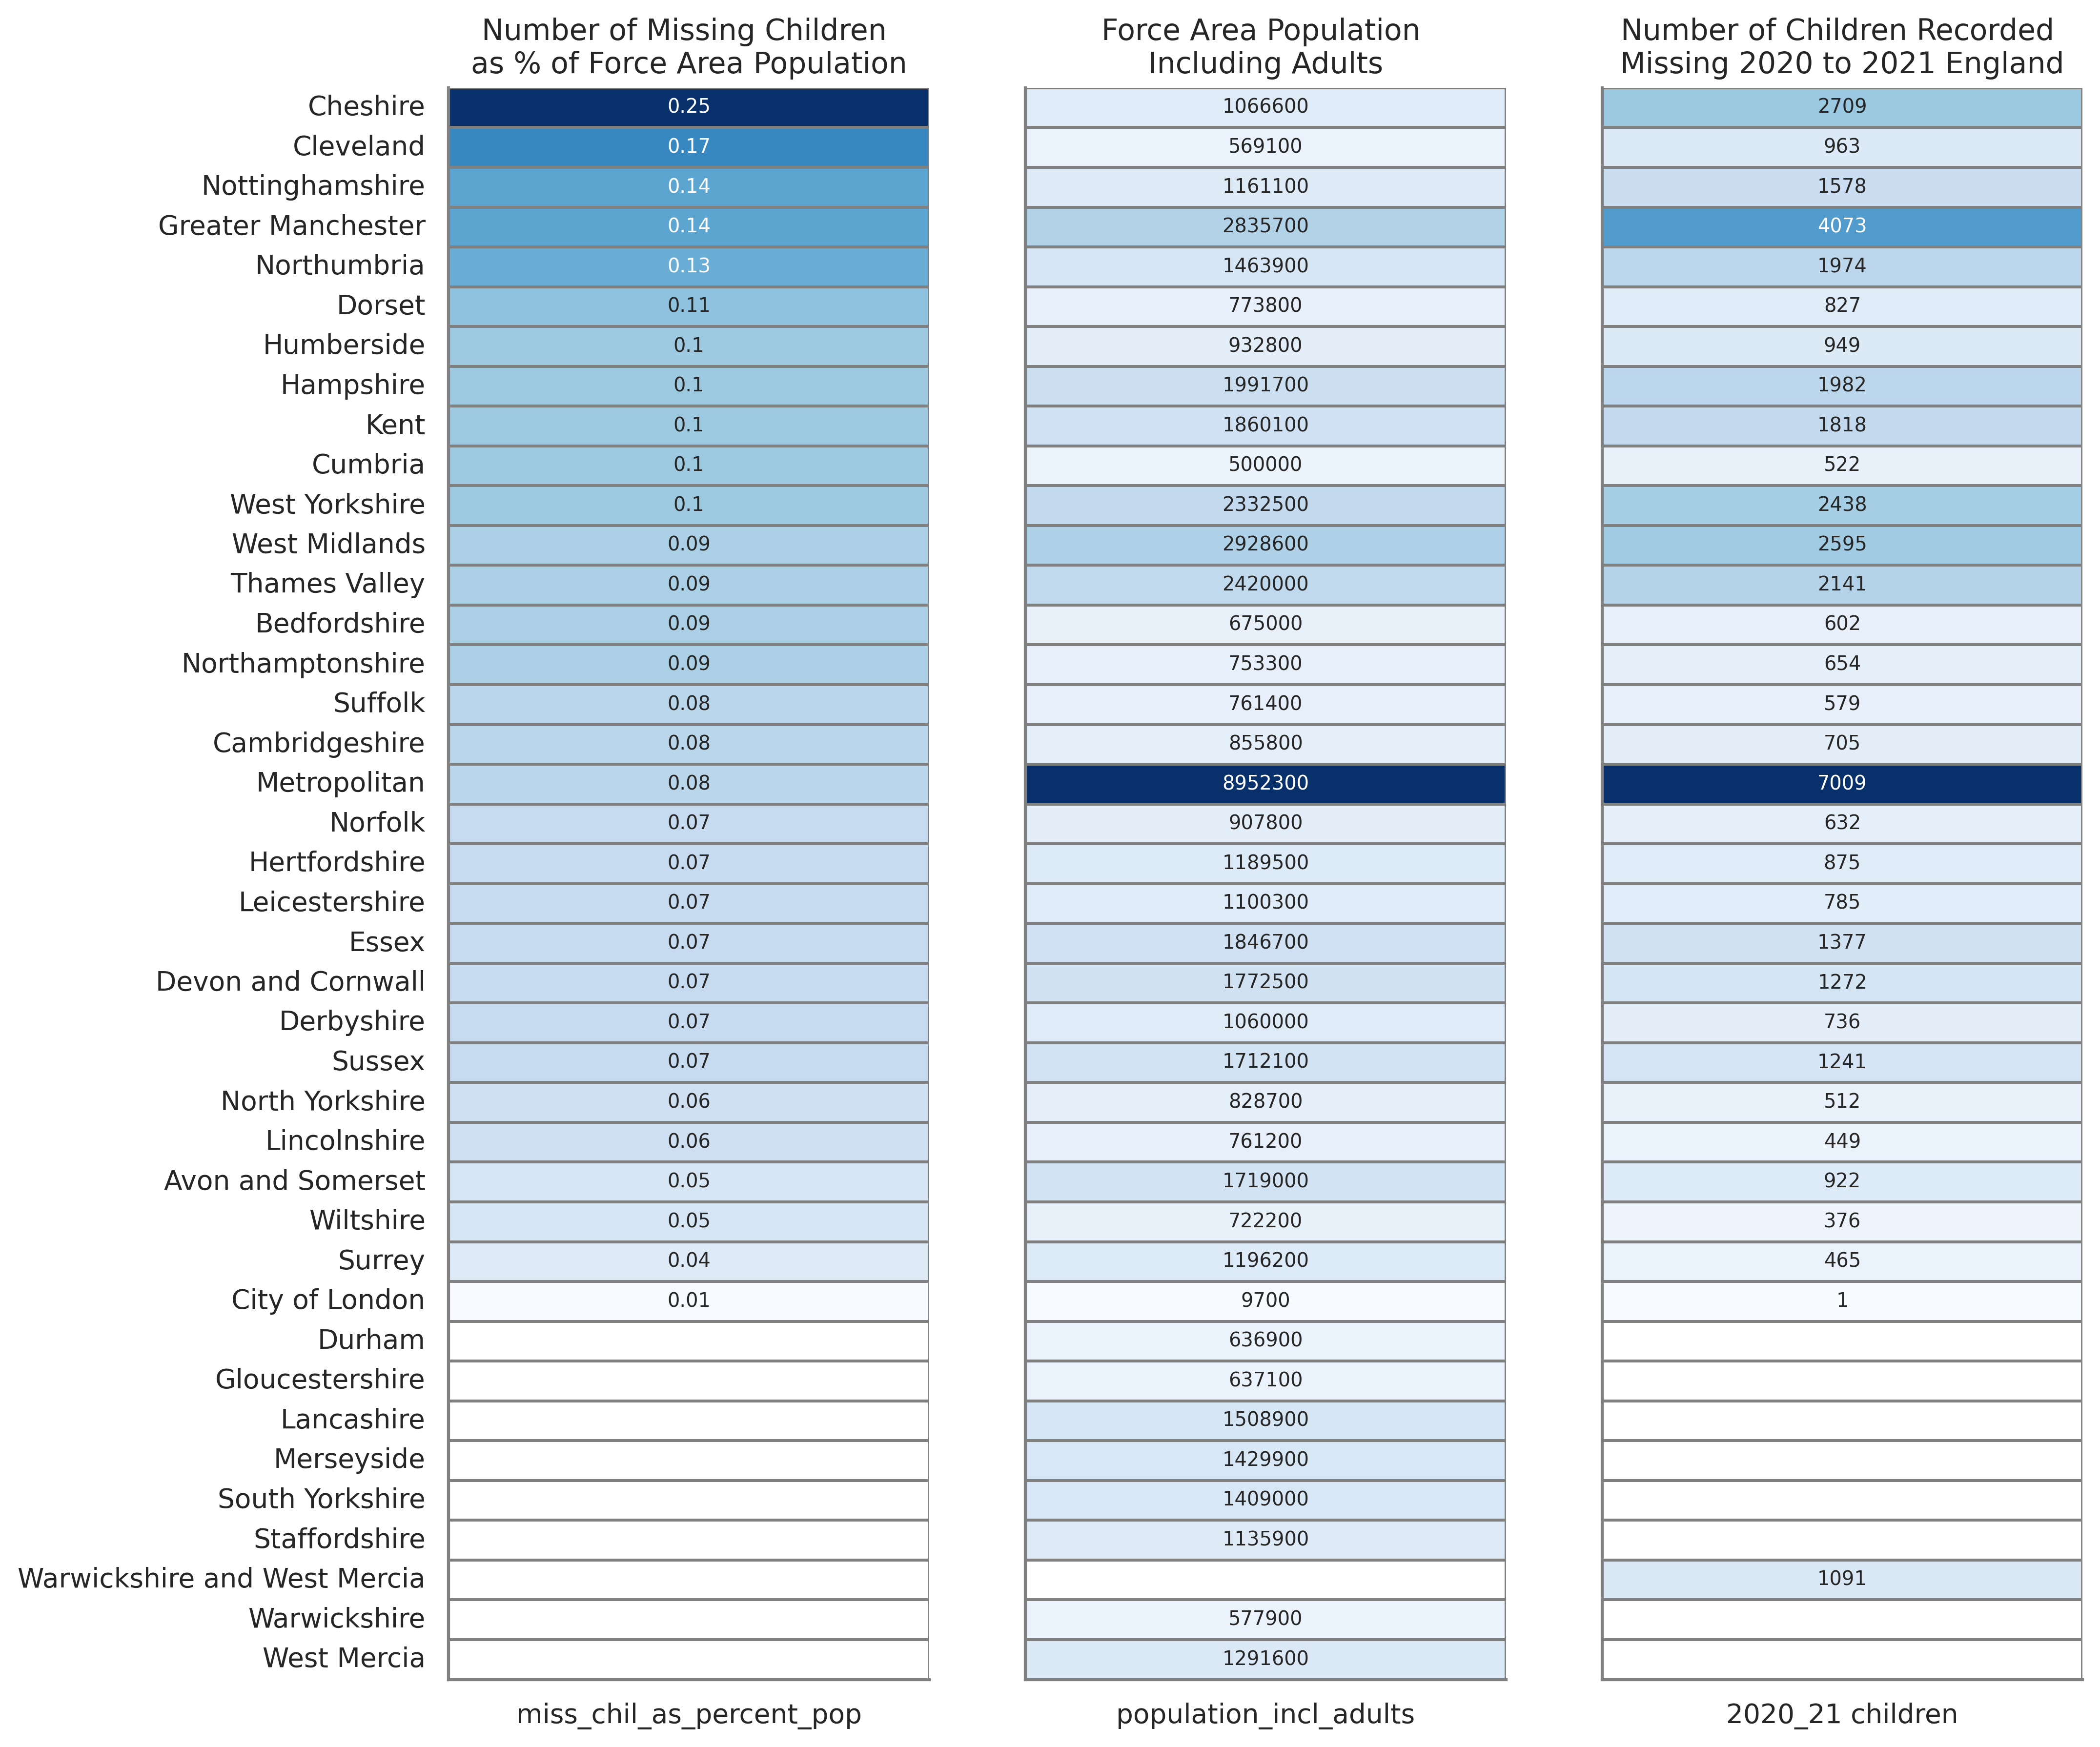

In [10]:
# create 3 heatmaps side-by-side showing the 2020-21 missing children figures,
# force area population, and number of missing children as a % of pop.

fig, ax = plt.subplots(figsize=(12,12), dpi=360, ncols=3, sharey=True)

pc_pop_heatmap_df = num_miss_chil_and_pop_prop[['miss_chil_as_percent_pop']]
sns.heatmap(pc_pop_heatmap_df, 
            annot=True, 
            fmt="g", 
            cmap='Blues',
            linewidths=1, 
            linecolor='grey',
            annot_kws={'size':8},
            cbar=False,
            ax=ax[0])

pop_heatmap_df = num_miss_chil_and_pop_prop[['population_incl_adults']]
sns.heatmap(pop_heatmap_df, 
            annot=True, 
            fmt=".0f", 
            cmap='Blues',
            linewidths=1, 
            linecolor='grey',
            annot_kws={'size':8},
            cbar=False,
            ax=ax[1])

num_miss_chil_heatmap_df = num_miss_chil_and_pop_prop[['2020_21 children']]
sns.heatmap(num_miss_chil_heatmap_df, 
            annot=True, 
            fmt="g", 
            cmap='Blues',
            linewidths=1, 
            linecolor='grey',
            annot_kws={'size':8},
            cbar=False,
            ax=ax[2])

ax[0].set_title('Number of Missing Children \nas % of Force Area Population')
ax[1].set_title('Force Area Population \nIncluding Adults')
ax[2].set_title('Number of Children Recorded \nMissing 2020 to 2021 England')

ax[0].set_ylabel('')
ax[1].set_ylabel('')
ax[2].set_ylabel('')

sns.despine();

plot_title = "Number of Children Recorded Missing"
plt.savefig(plot_title,
            bbox_inches = "tight");

## Change from previous year (missing children)

In [11]:
prev_yr_data = missing[['police_force', 
                               'num_diff_to_2019_20_children', 
                               'percent_diff_to_2019_20_children']]

prev_yr_data = prev_yr_data.sort_values(by='percent_diff_to_2019_20_children',
                                        ascending=False)

prev_yr_data

police_force  num_diff_to_2019_20_children  \
27               Nottinghamshire                         677.0   
3                       Cheshire                        1099.0   
26                   Northumbria                         266.0   
14                     Hampshire                         -83.0   
15                 Hertfordshire                        -123.0   
30                       Suffolk                        -120.0   
25              Northamptonshire                        -140.0   
7                     Derbyshire                        -197.0   
8             Devon and Cornwall                        -341.0   
1                   Bedfordshire                        -161.0   
5                      Cleveland                        -259.0   
24               North Yorkshire                        -143.0   
2                 Cambridgeshire                        -209.0   
0              Avon and Somerset                        -284.0   
17                          Kent                        -573.0   
9                         Dorset                        -261.0   
22                  Metropolitan                       -2376.0   
11                         Essex                        -473.0   
19                Leicestershire                        -271.0   
16                    Humberside                        -364.0   
23                       Norfolk                        -247.0   
34  Warwickshire and West Mercia                        -438.0   
32                        Sussex                        -531.0   
13            Greater Manchester                       -1782.0   
33                 Thames Valley                       -1050.0   
36                West Yorkshire                       -1200.0   
20                  Lincolnshire                        -273.0   
6                        Cumbria                        -318.0   
35                 West Midlands                       -1646.0   
37                     Wiltshire                        -246.0   
31                        Surrey                        -765.0   
4                 City of London                          -8.0   
10                        Durham                           NaN   
12               Gloucestershire                           NaN   
18                    Lancashire                           NaN   
21                    Merseyside                           NaN   
28               South Yorkshire                           NaN   
29                 Staffordshire                           NaN   
38                  Warwickshire                           NaN   
39                   West Mercia                           NaN   

    percent_diff_to_2019_20_children  
27                              75.1  
3                               68.3  
26                              15.6  
14                              -4.0  
15                             -12.3  
30                             -17.2  
25                             -17.6  
7                              -21.1  
8                              -21.1  
1                              -21.1  
5                              -21.2  
24                             -21.8  
2                              -22.9  
0                              -23.5  
17                             -24.0  
9                              -24.0  
22                             -25.3  
11                             -25.6  
19                             -25.7  
16                             -27.7  
23                             -28.1  
34                             -28.6  
32                             -30.0  
13                             -30.4  
33                             -32.9  
36                             -33.0  
20                             -37.8  
6                              -37.9  
35                             -38.8  
37                             -39.5  
31                             -62.2  
4                              -88.9  
10                        

In [12]:
prev_yr_data_percent = prev_yr_data[['police_force', 'percent_diff_to_2019_20_children']]
prev_yr_data_num = prev_yr_data[['police_force', 'num_diff_to_2019_20_children']]

In [13]:
top_pc_1 = prev_yr_data_percent.iloc[0]['percent_diff_to_2019_20_children']
top_pc_2 = prev_yr_data_percent.iloc[1]['percent_diff_to_2019_20_children']
top_pc_3 = prev_yr_data_percent.iloc[2]['percent_diff_to_2019_20_children']

print(top_pc_1)
print(top_pc_2)
print(top_pc_3)

75.1
68.3
15.6


In [14]:
top_num_1 = prev_yr_data_num.iloc[0]['num_diff_to_2019_20_children']
top_num_2 = prev_yr_data_num.iloc[1]['num_diff_to_2019_20_children']
top_num_3 = prev_yr_data_num.iloc[2]['num_diff_to_2019_20_children']

print(top_num_1)
print(top_num_2)
print(top_num_3)


677.0
1099.0
266.0


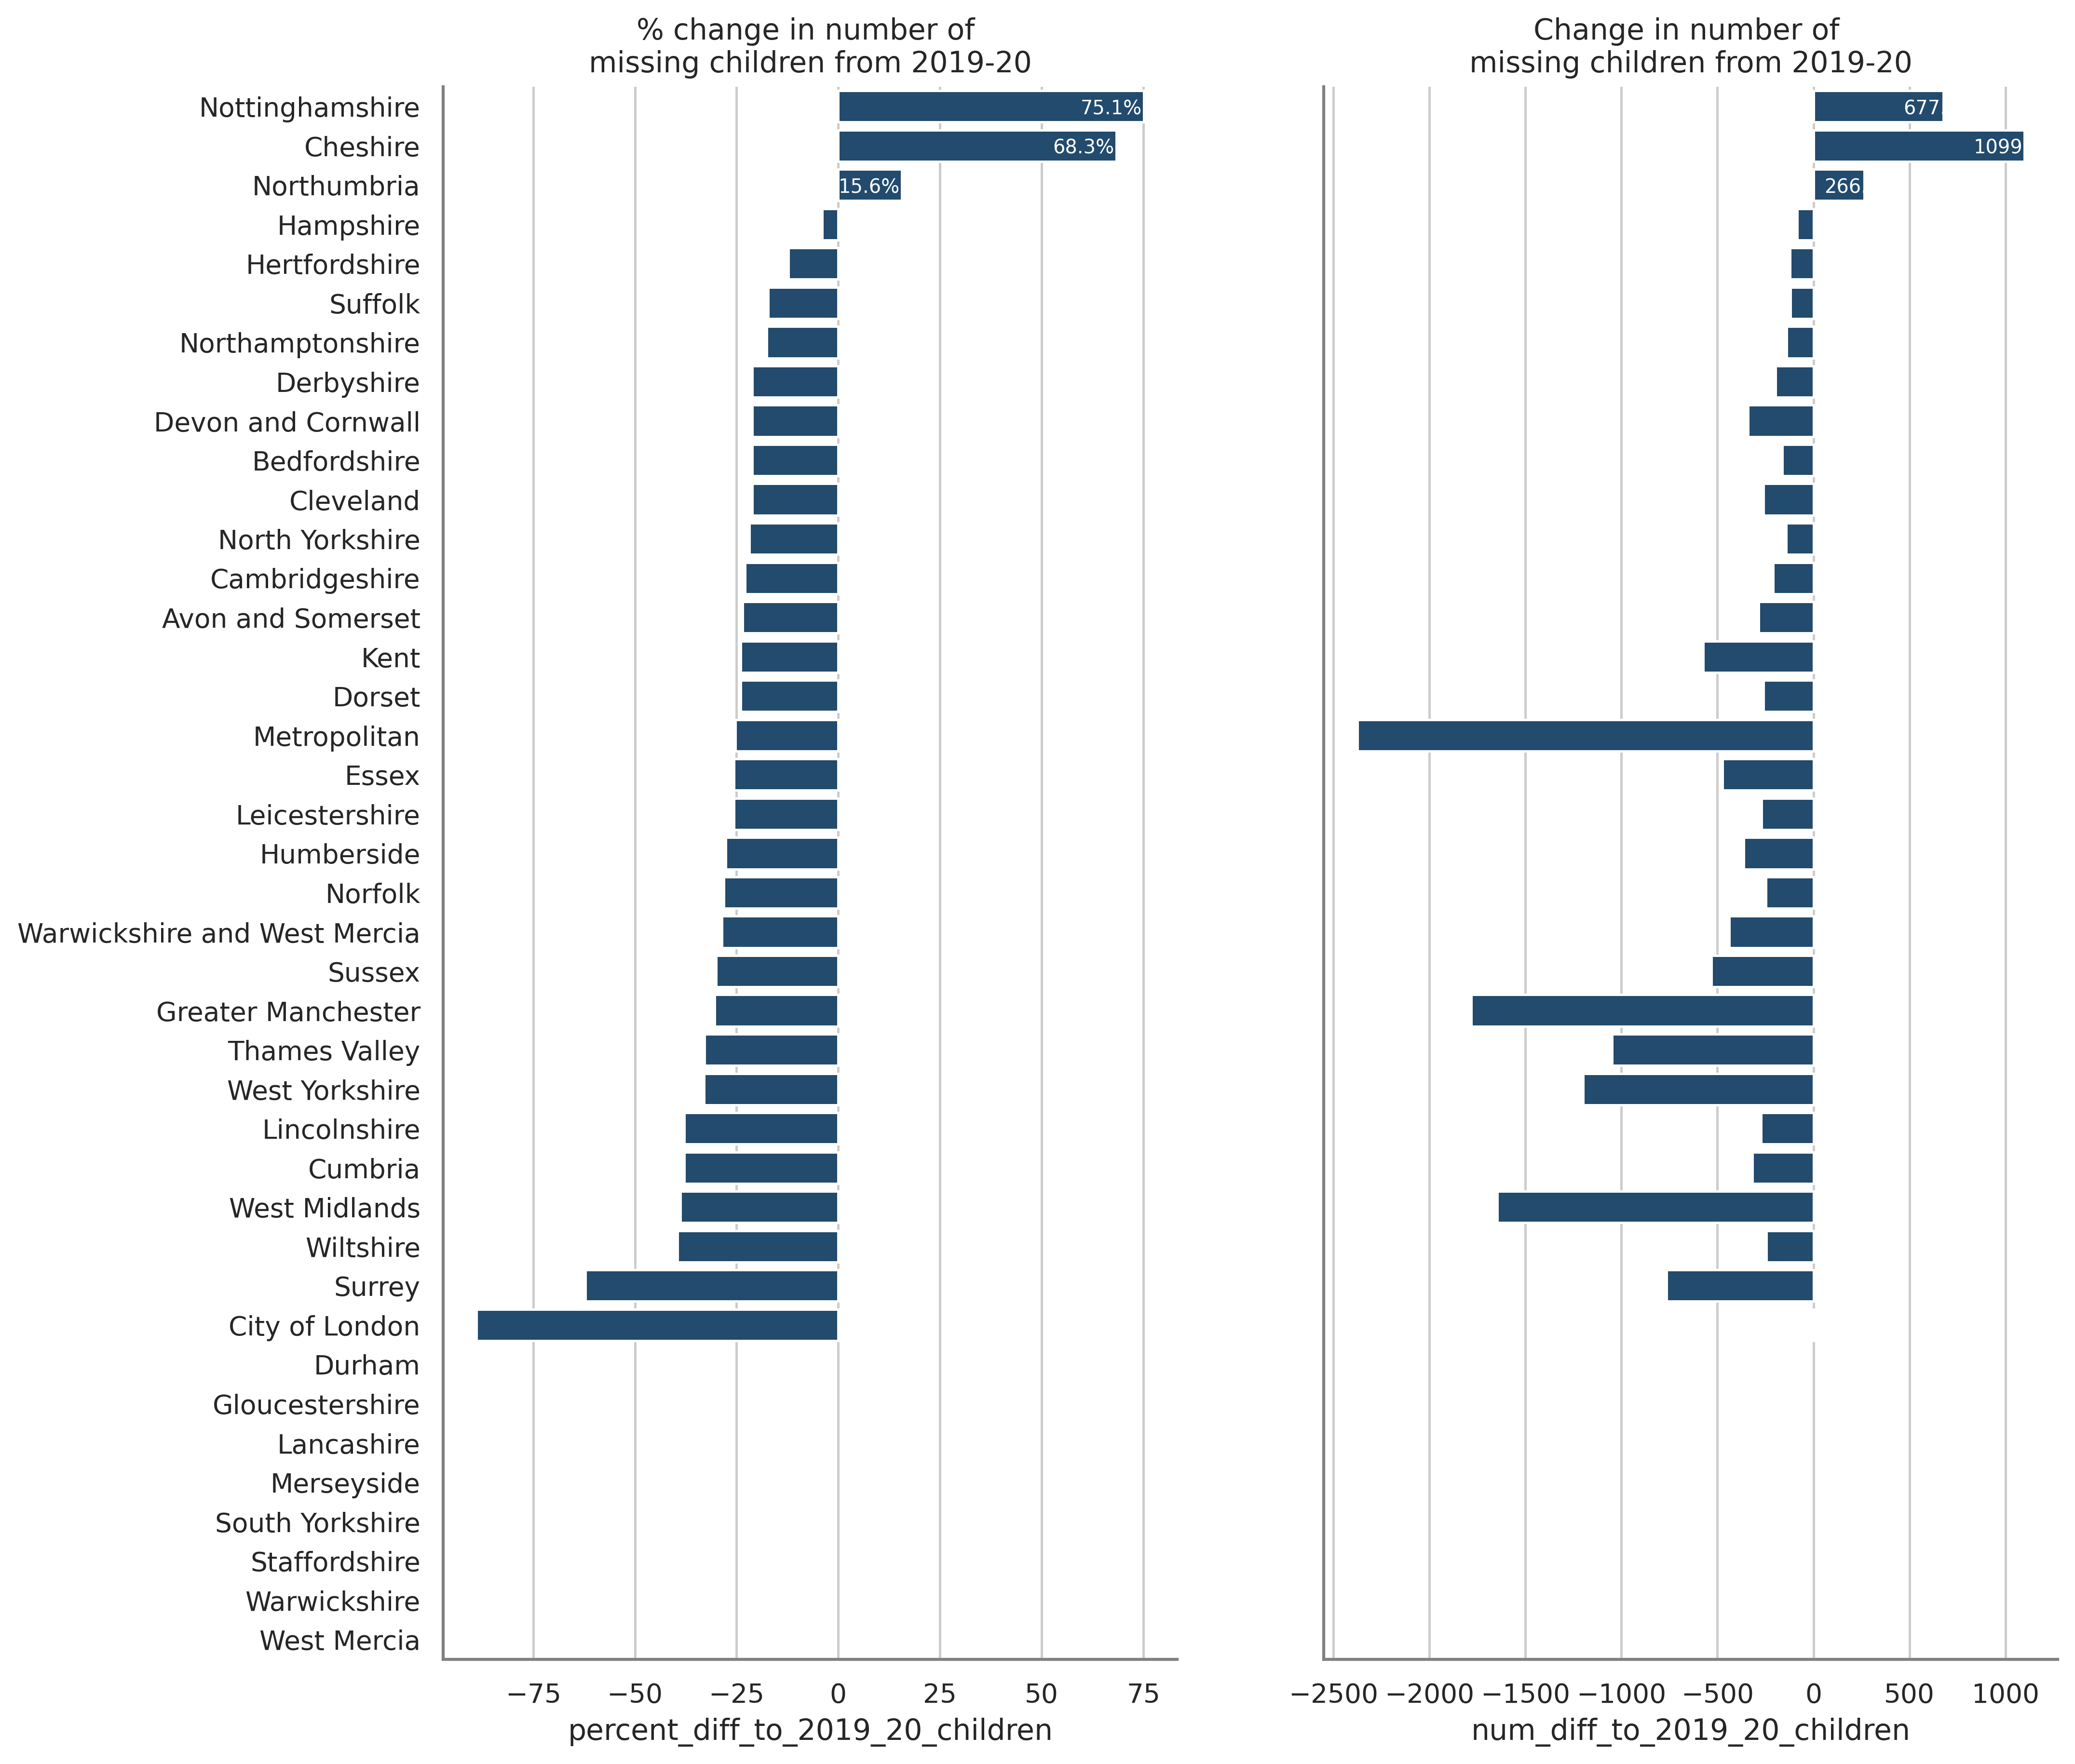

In [15]:
fig, ax = plt.subplots(figsize=(12,12), dpi=360, ncols=2, sharey=True)

sns.barplot(data=prev_yr_data_percent, 
            y="police_force", 
            x="percent_diff_to_2019_20_children", 
            color = plot_colour, ax=ax[0])

sns.barplot(data=prev_yr_data_num, 
            y="police_force", 
            x="num_diff_to_2019_20_children", 
            color = plot_colour, ax=ax[1])

ax[0].set_title('% change in number of \nmissing children from 2019-20')
ax[1].set_title('Change in number of \nmissing children from 2019-20')

ax[0].set_ylabel('')
ax[1].set_ylabel('')

ax[0].text(x=top_pc_1-8, y=0.2, s=str(top_pc_1)+'%', color='white', fontsize=8, horizontalalignment='center')
ax[0].text(x=top_pc_2-8, y=1.2, s=str(top_pc_2)+'%', color='white', fontsize=8, horizontalalignment='center')
ax[0].text(x=top_pc_3-8, y=2.2, s=str(top_pc_3)+'%', color='white', fontsize=8, horizontalalignment='center')


ax[1].text(x=top_num_1-65, y=0.2, s=str(top_num_1), color='white', fontsize=8, horizontalalignment='center')
ax[1].text(x=top_num_2-90, y=1.2, s=str(top_num_2), color='white', fontsize=8, horizontalalignment='center')
ax[1].text(x=top_num_3-65, y=2.2, s=str(top_num_3), color='white', fontsize=8, horizontalalignment='center')

sns.despine();


plot_title = "Change Since Previous Year"
plt.savefig(plot_title,
            bbox_inches = "tight");

## All previous years (missing children)

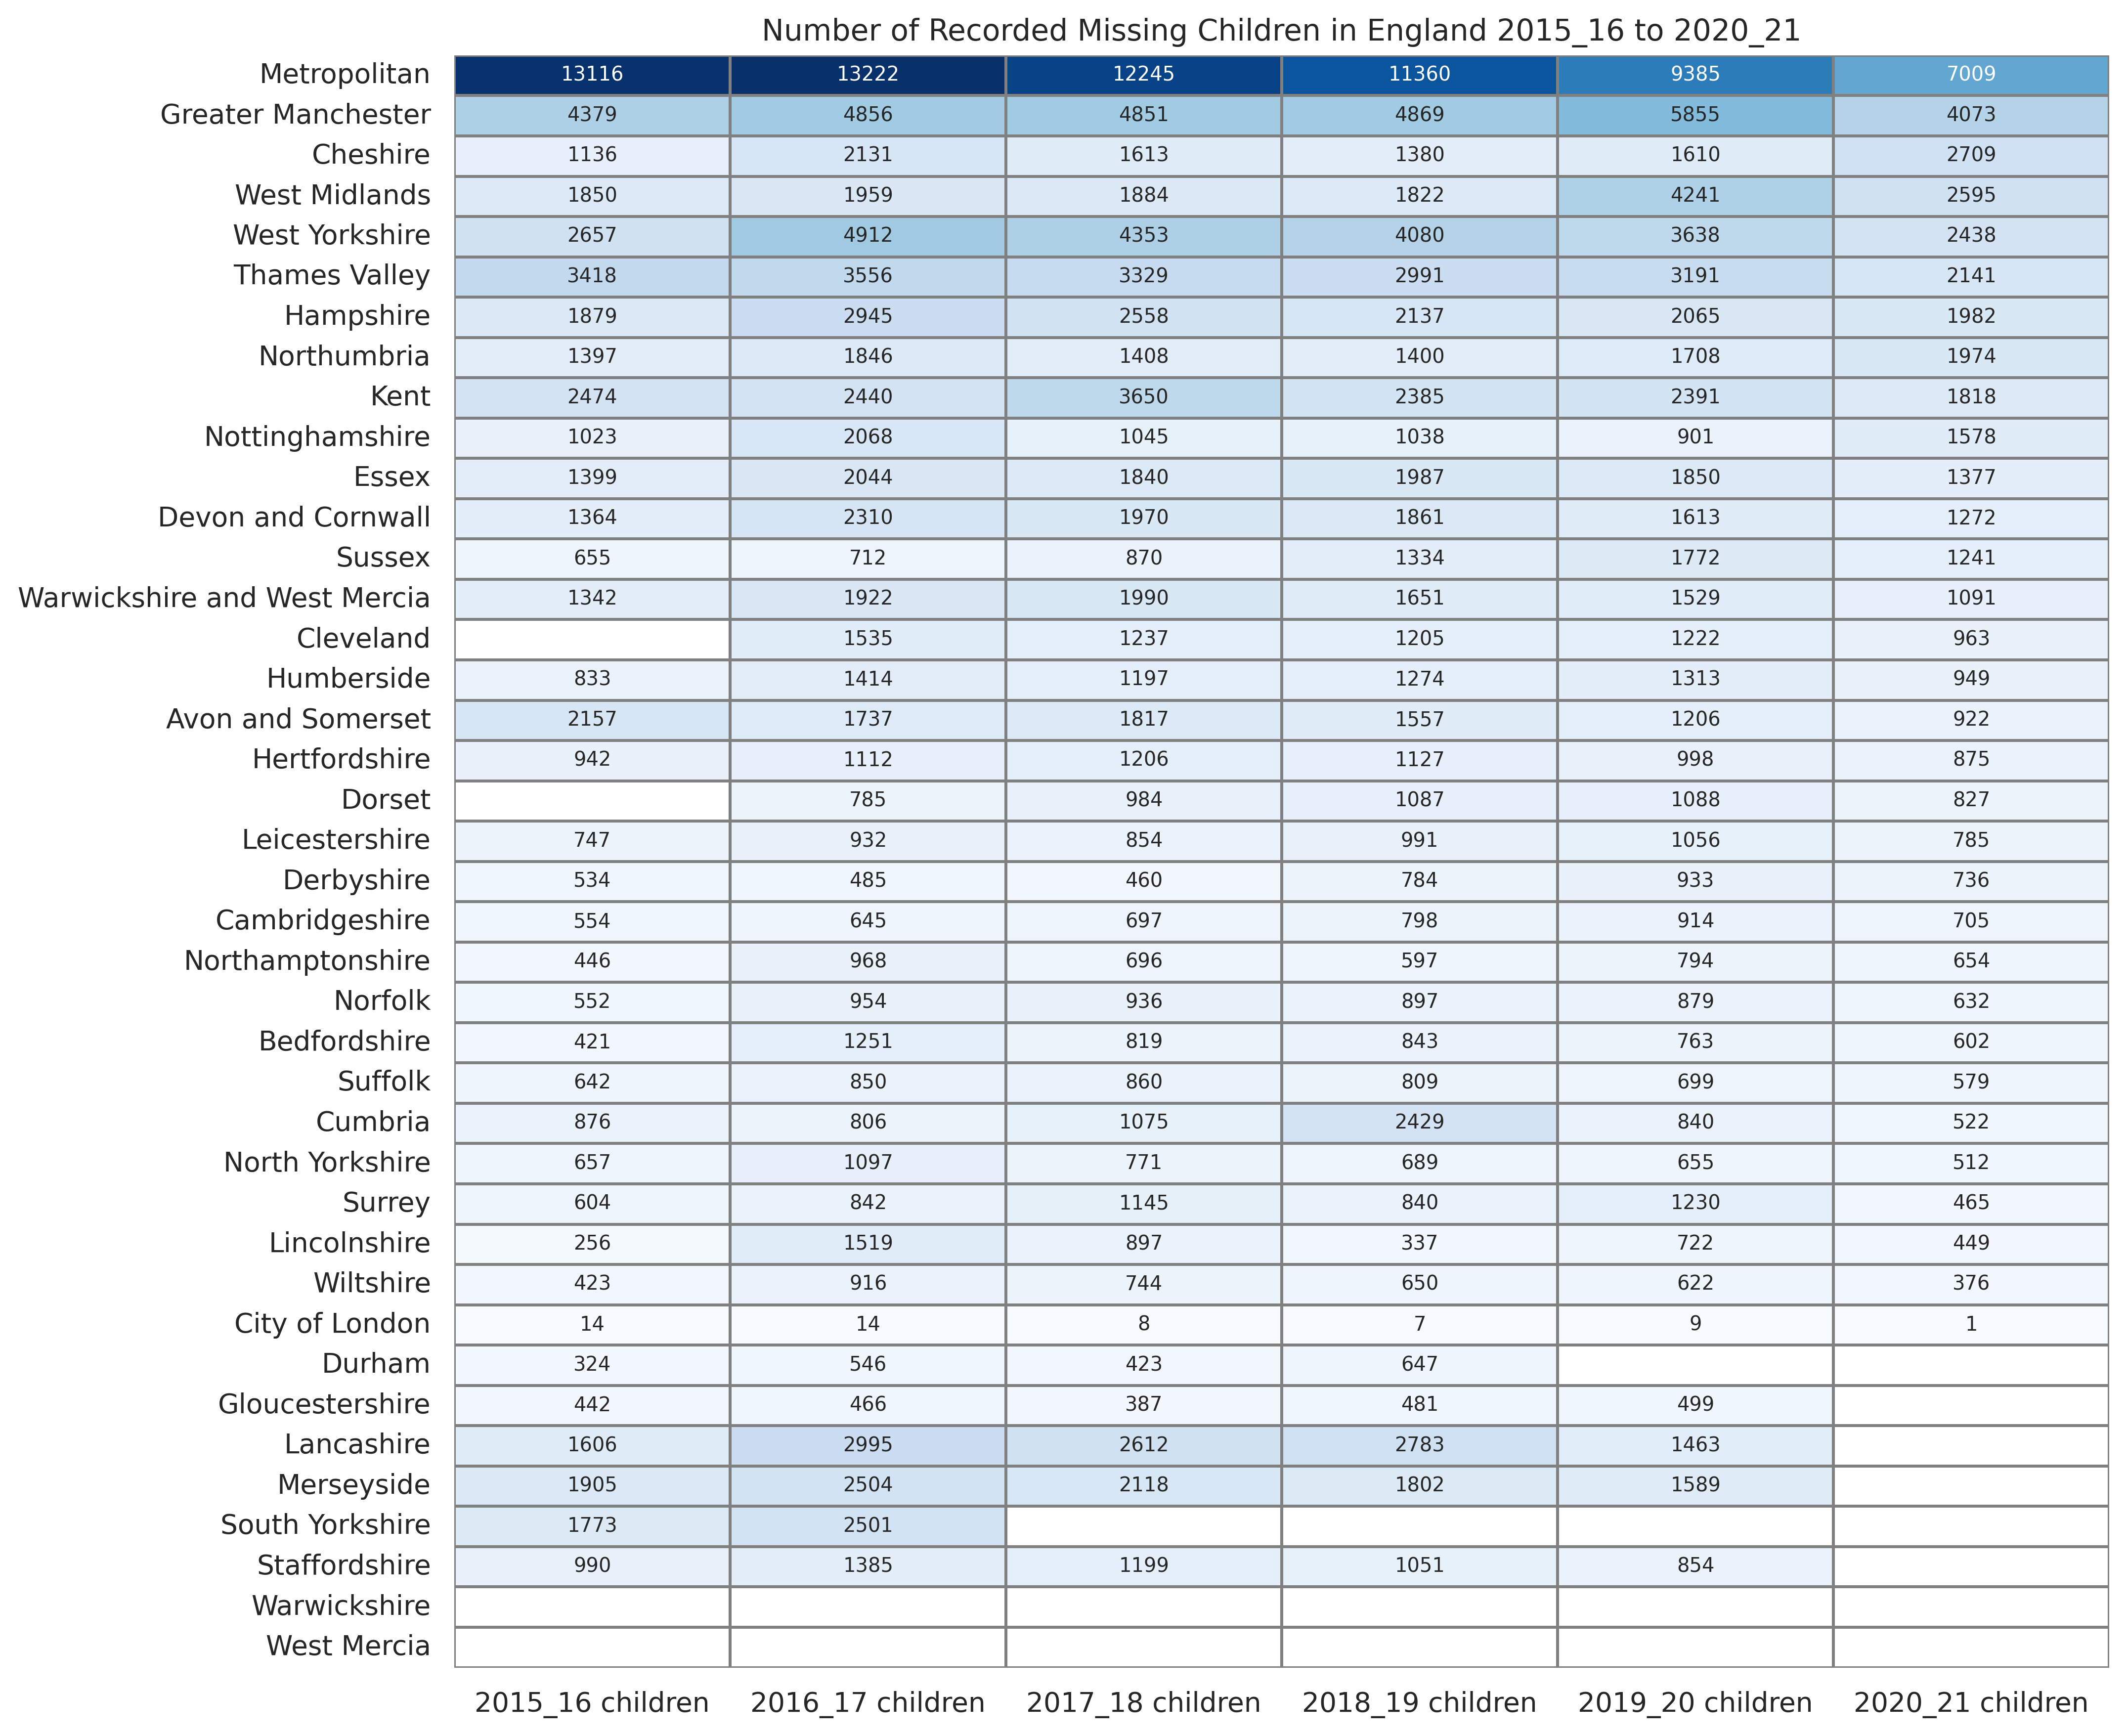

In [16]:
# heatmap of number of missing children per force per year

years = missing.iloc[:,0:7]
years = years.sort_values(by="2020_21 children", ascending=False)
years = years.set_index('police_force')

fig, ax = plt.subplots(figsize=(12,12), dpi=360)
sns.heatmap(years, 
            annot=True, 
            fmt="g", 
            cmap='Blues',
            linewidths=1, 
            linecolor='grey',
            cbar=False,
            annot_kws={'size':8})
plt.ylabel('')
plt.title('Number of Recorded Missing Children in England 2015_16 to 2020_21')

plot_title = "Recorded Missing Children in England 2015_16 to 2020_21"
plt.savefig(plot_title,
            bbox_inches = "tight");

## Age distribution (all missing people)

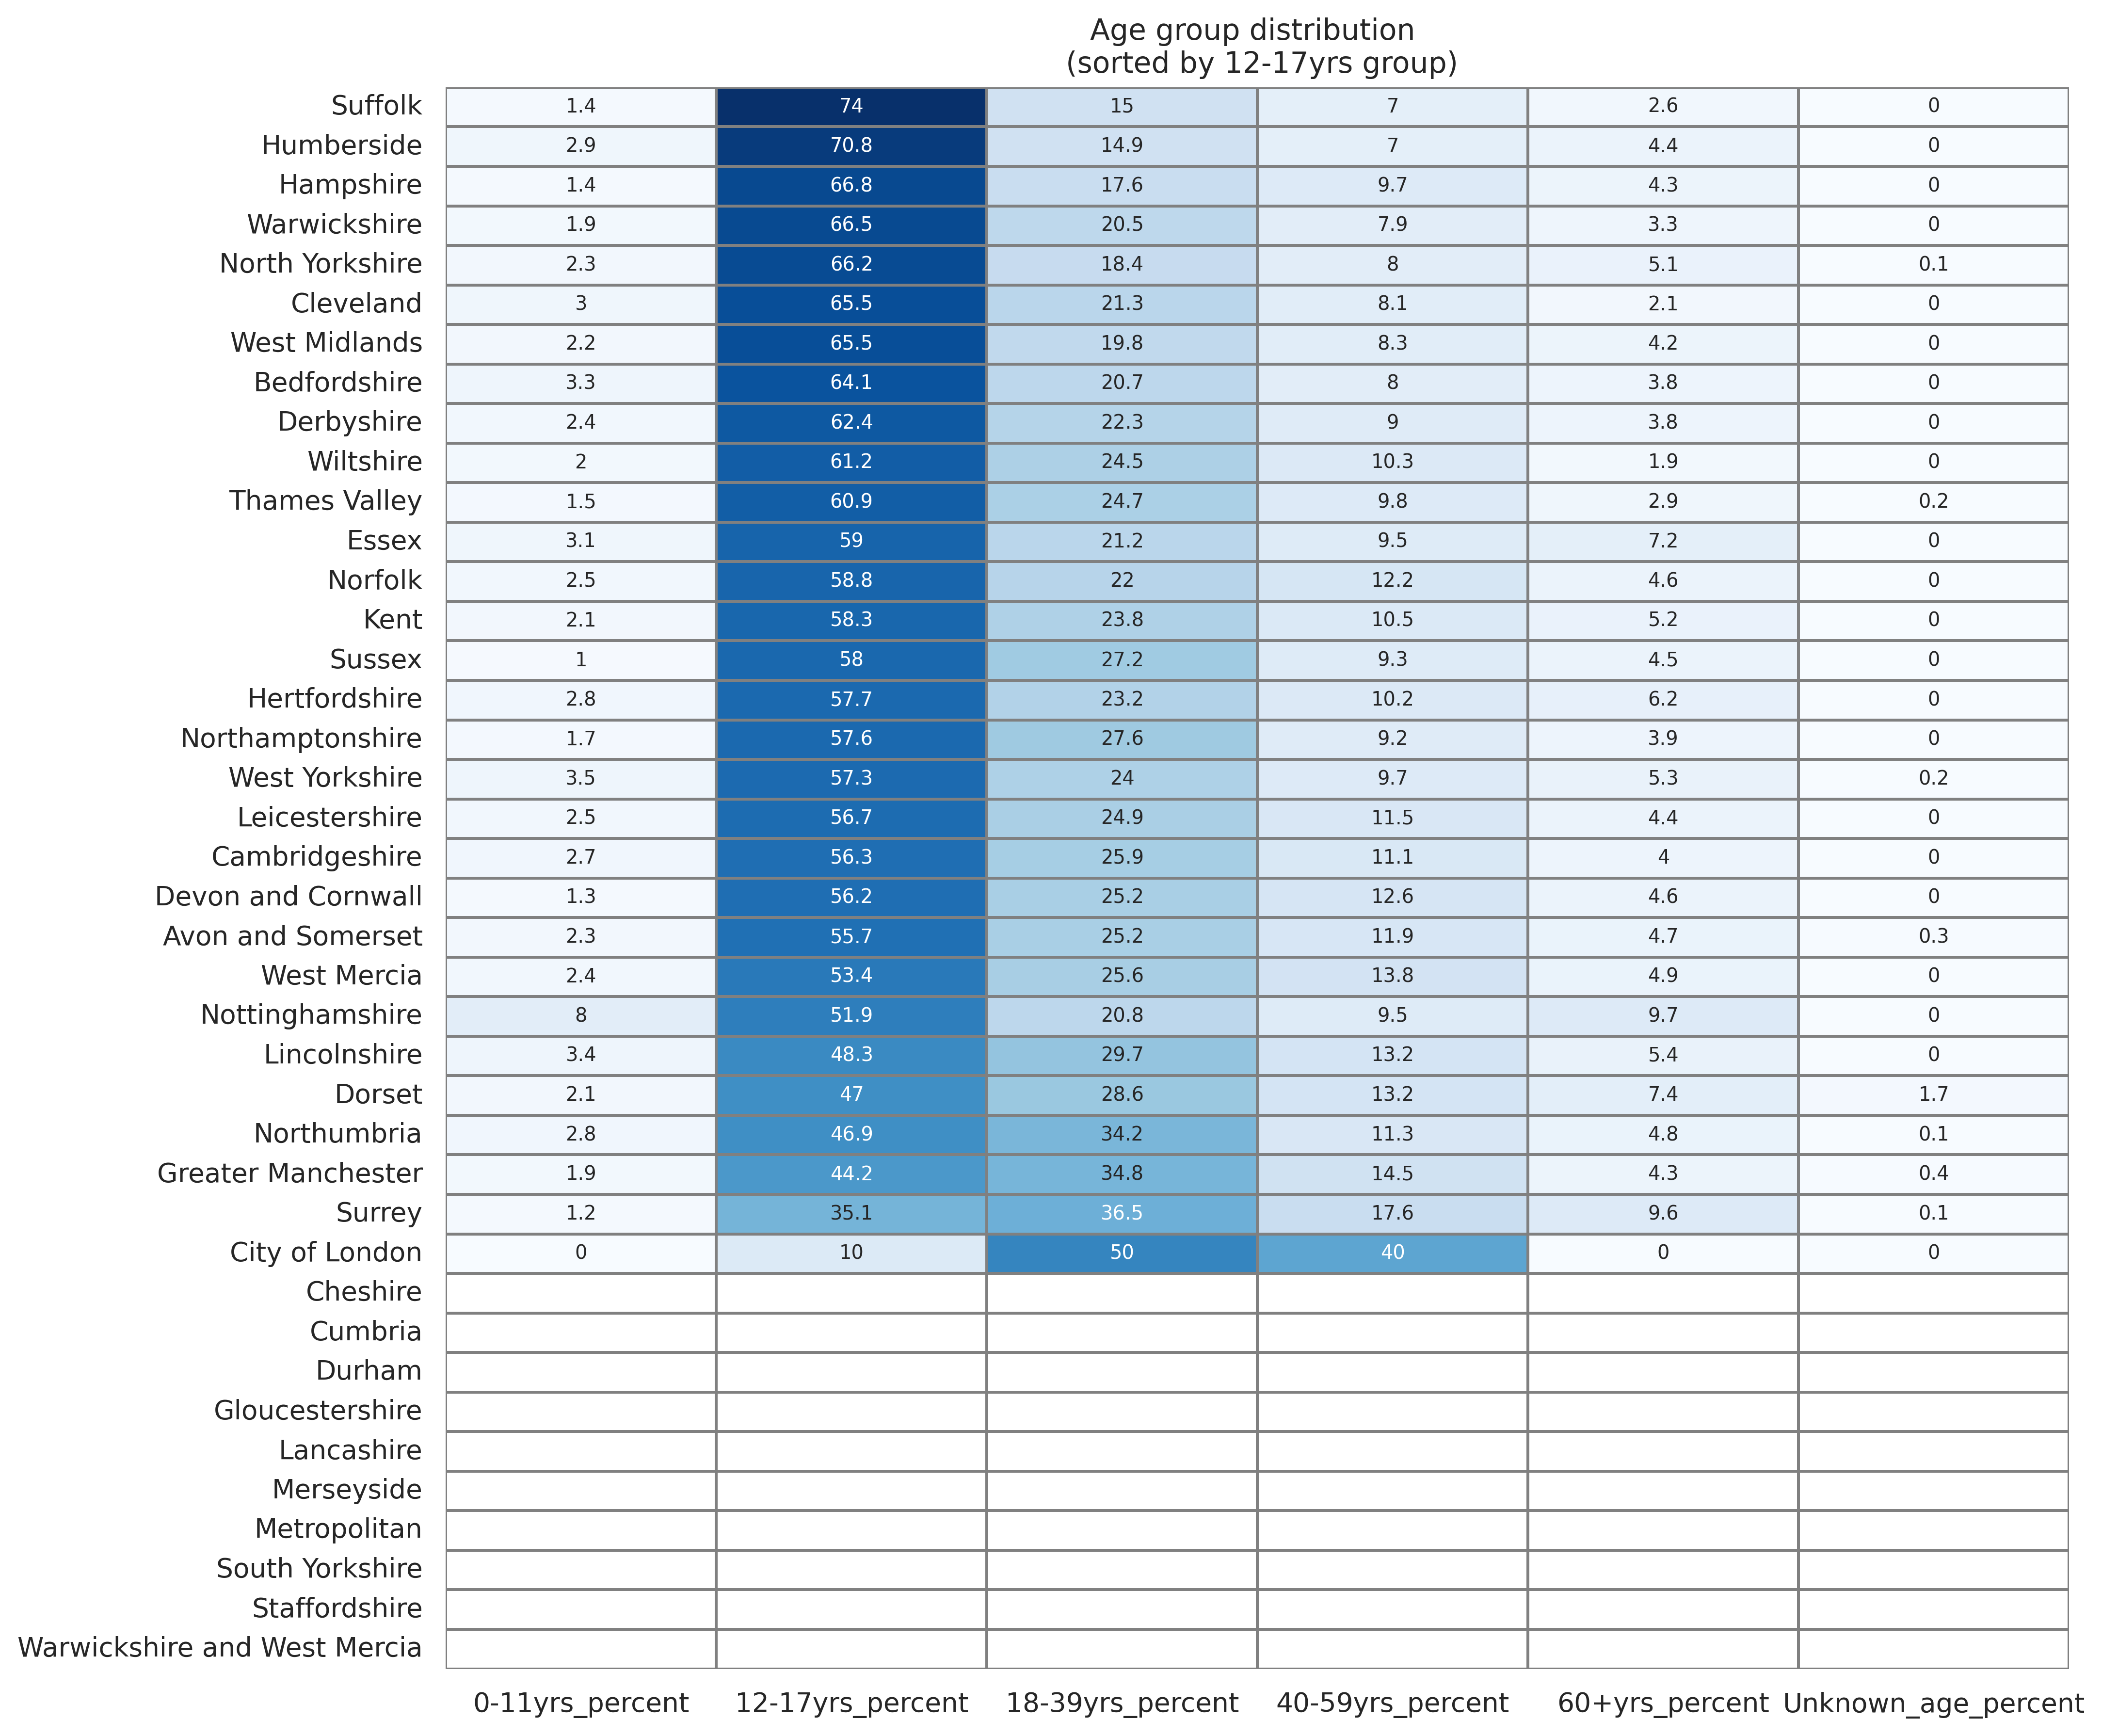

In [17]:
# heatmap of % for each age group by force
age = missing[['police_force', 
               '0-11yrs_percent', 
               '12-17yrs_percent', 
               '18-39yrs_percent', 
               '40-59yrs_percent', 
               '60+yrs_percent',
               'Unknown_age_percent']]
age = age.sort_values(by="12-17yrs_percent", ascending=False)
age = age.set_index('police_force')

fig, ax = plt.subplots(figsize=(12,12), dpi=360)
sns.heatmap(age, 
            annot=True, 
            fmt="g", 
            cmap='Blues',
            linewidths=1, 
            linecolor='grey',
            cbar=False,
            annot_kws={'size':8})
plt.ylabel('')
plt.title('Age group distribution \n (sorted by 12-17yrs group)')

plot_title = "Age group distribution"
plt.savefig(plot_title,
            bbox_inches = "tight");

## Children's homes context

In [18]:
# childrens home sectors
homes_sectors = pd.DataFrame(homes.groupby(['police_force', 'Sector']).size()).reset_index()
homes_sectors.columns=['police_force', 'Sector', 'num_homes']
homes_sectors = homes_sectors.pivot(index='police_force', columns='Sector', values='num_homes')
homes_sectors = homes_sectors.fillna(0)
homes_sectors['total_homes'] = homes_sectors['Health Authority'] +\
                               homes_sectors['Local Authority'] +\
                               homes_sectors['Private'] +\
                               homes_sectors['Voluntary']
homes_sectors = homes_sectors.reset_index()
homes_sectors = homes_sectors.set_index('police_force')
homes_sectors = homes_sectors.sort_values(by='total_homes', ascending=False)
homes_sectors

Sector              Health Authority  Local Authority  Private  Voluntary  \
police_force                                                                
Avon and Somerset                0.0             24.0    201.0        3.0   
Greater Manchester               0.0             34.0    163.0       21.0   
Lancashire                       0.0             19.0    191.0        0.0   
Staffordshire                    1.0             18.0    142.0        1.0   
North Yorkshire                  0.0             36.0    120.0        0.0   
West Midlands                    0.0             13.0    120.0        8.0   
West Mercia                      2.0              5.0    129.0        2.0   
Metropolitan                     1.0             17.0    105.0       12.0   
West Yorkshire                   0.0             36.0     88.0        3.0   
Merseyside                       0.0             10.0    101.0        6.0   
Devon and Cornwall               3.0              9.0     72.0        4.0   
Nottinghamshire                  0.0             13.0     58.0        7.0   
Kent                             0.0              7.0     63.0        8.0   
Cheshire                         0.0              8.0     67.0        2.0   
Humberside                       0.0             32.0     38.0        0.0   
Hampshire                        0.0             13.0     55.0        1.0   
Thames Valley                    0.0             11.0     47.0       10.0   
Dorset                           0.0             12.0     54.0        1.0   
Leicestershire                   0.0              5.0     58.0        2.0   
Northumbria                      0.0             22.0     26.0       15.0   
Derbyshire                       0.0             18.0     44.0        0.0   
Sussex                           0.0             12.0     45.0        0.0   
South Yorkshire                  0.0             12.0     40.0        5.0   
Durham                           0.0             14.0     35.0        3.0   
Essex                            0.0              2.0     47.0        1.0   
Northamptonshire                 2.0              5.0     39.0        0.0   
Cleveland                        0.0             16.0     27.0        0.0   
Cumbria                          0.0              6.0     32.0        3.0   
Norfolk                          0.0              9.0     19.0       10.0   
Cambridgeshire                   0.0              4.0     26.0        3.0   
Bedfordshire                     0.0              6.0     23.0        1.0   
Suffolk                          0.0              5.0     20.0        0.0   
Wiltshire                        0.0              2.0     21.0        0.0   
Surrey                           0.0             10.0      5.0        5.0   
Hertfordshire                    0.0              7.0      8.0        4.0   
Warwickshire                     0.0              0.0     10.0        1.0   

Sector              total_homes  
police_force                     
Avon and Somerset         228.0  
Greater Manchester        218.0  
Lancashire                210.0  
Staffordshire             162.0  
North Yorkshire           156.0  
West Midlands             141.0  
West Mercia               138.0  
Metropolitan              135.0  
West Yorkshire            127.0  
Merseyside                117.0  
Devon and Cornwall         88.0  
Nottinghamshire            78.0  
Kent                       78.0  
Cheshire                   77.0  
Humberside                 70.0  
Hampshire                  69.0  
Thames Valley              68.0  
Dorset                     67.0  
Leicestershire             65.0  
Northumbria                63.0  
Derbyshire                 62.0  
Sussex                     57.0  
South Yorkshire            57.0  
Durham                     52.0  
Essex                      50.0  
Northamptonshire           46.0  
Cleveland                  43.0  
Cumbria                    41.0  
Norfolk                    38.0  
Cambridgeshire     

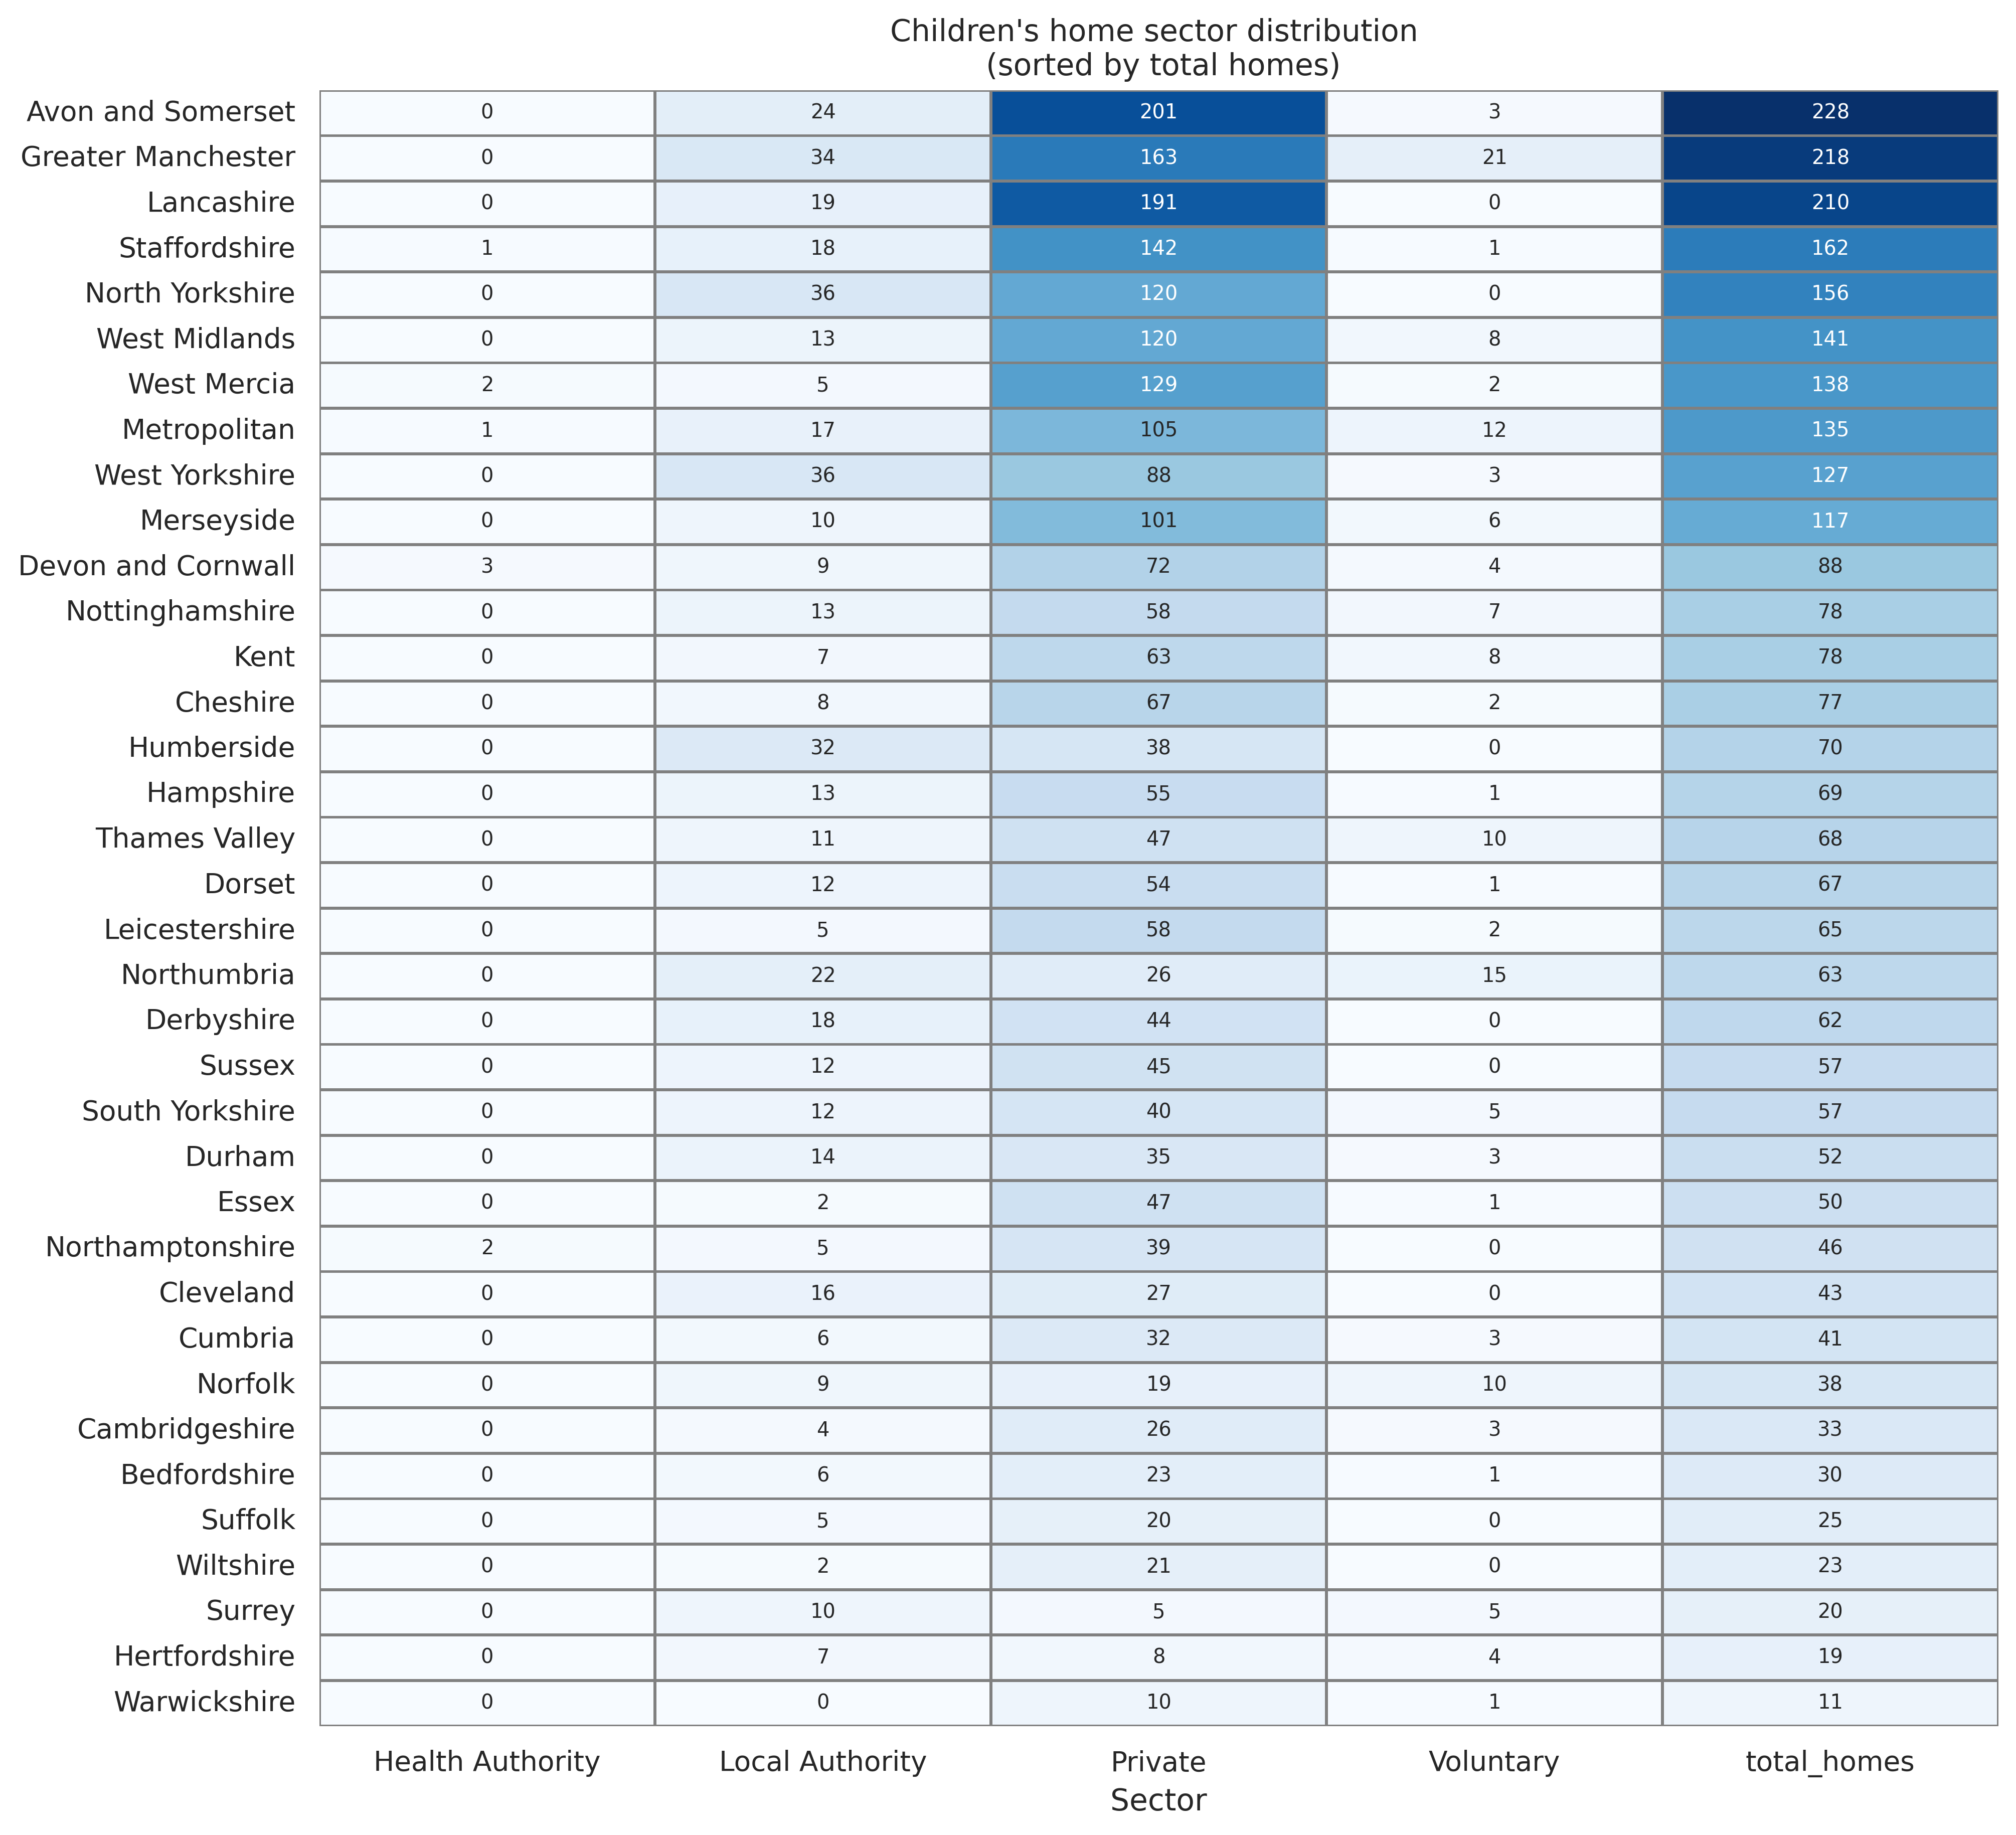

In [19]:
fig, ax = plt.subplots(figsize=(12,12), dpi=360)
sns.heatmap(homes_sectors, 
            annot=True, 
            fmt="g", 
            cmap='Blues',
            linewidths=1, 
            linecolor='grey',
            cbar=False,
            annot_kws={'size':8})
plt.ylabel('')
plt.title("Children's home sector distribution \n (sorted by total homes)")

plot_title = "Childrens home sector distribution"
plt.savefig(plot_title,
            bbox_inches = "tight");

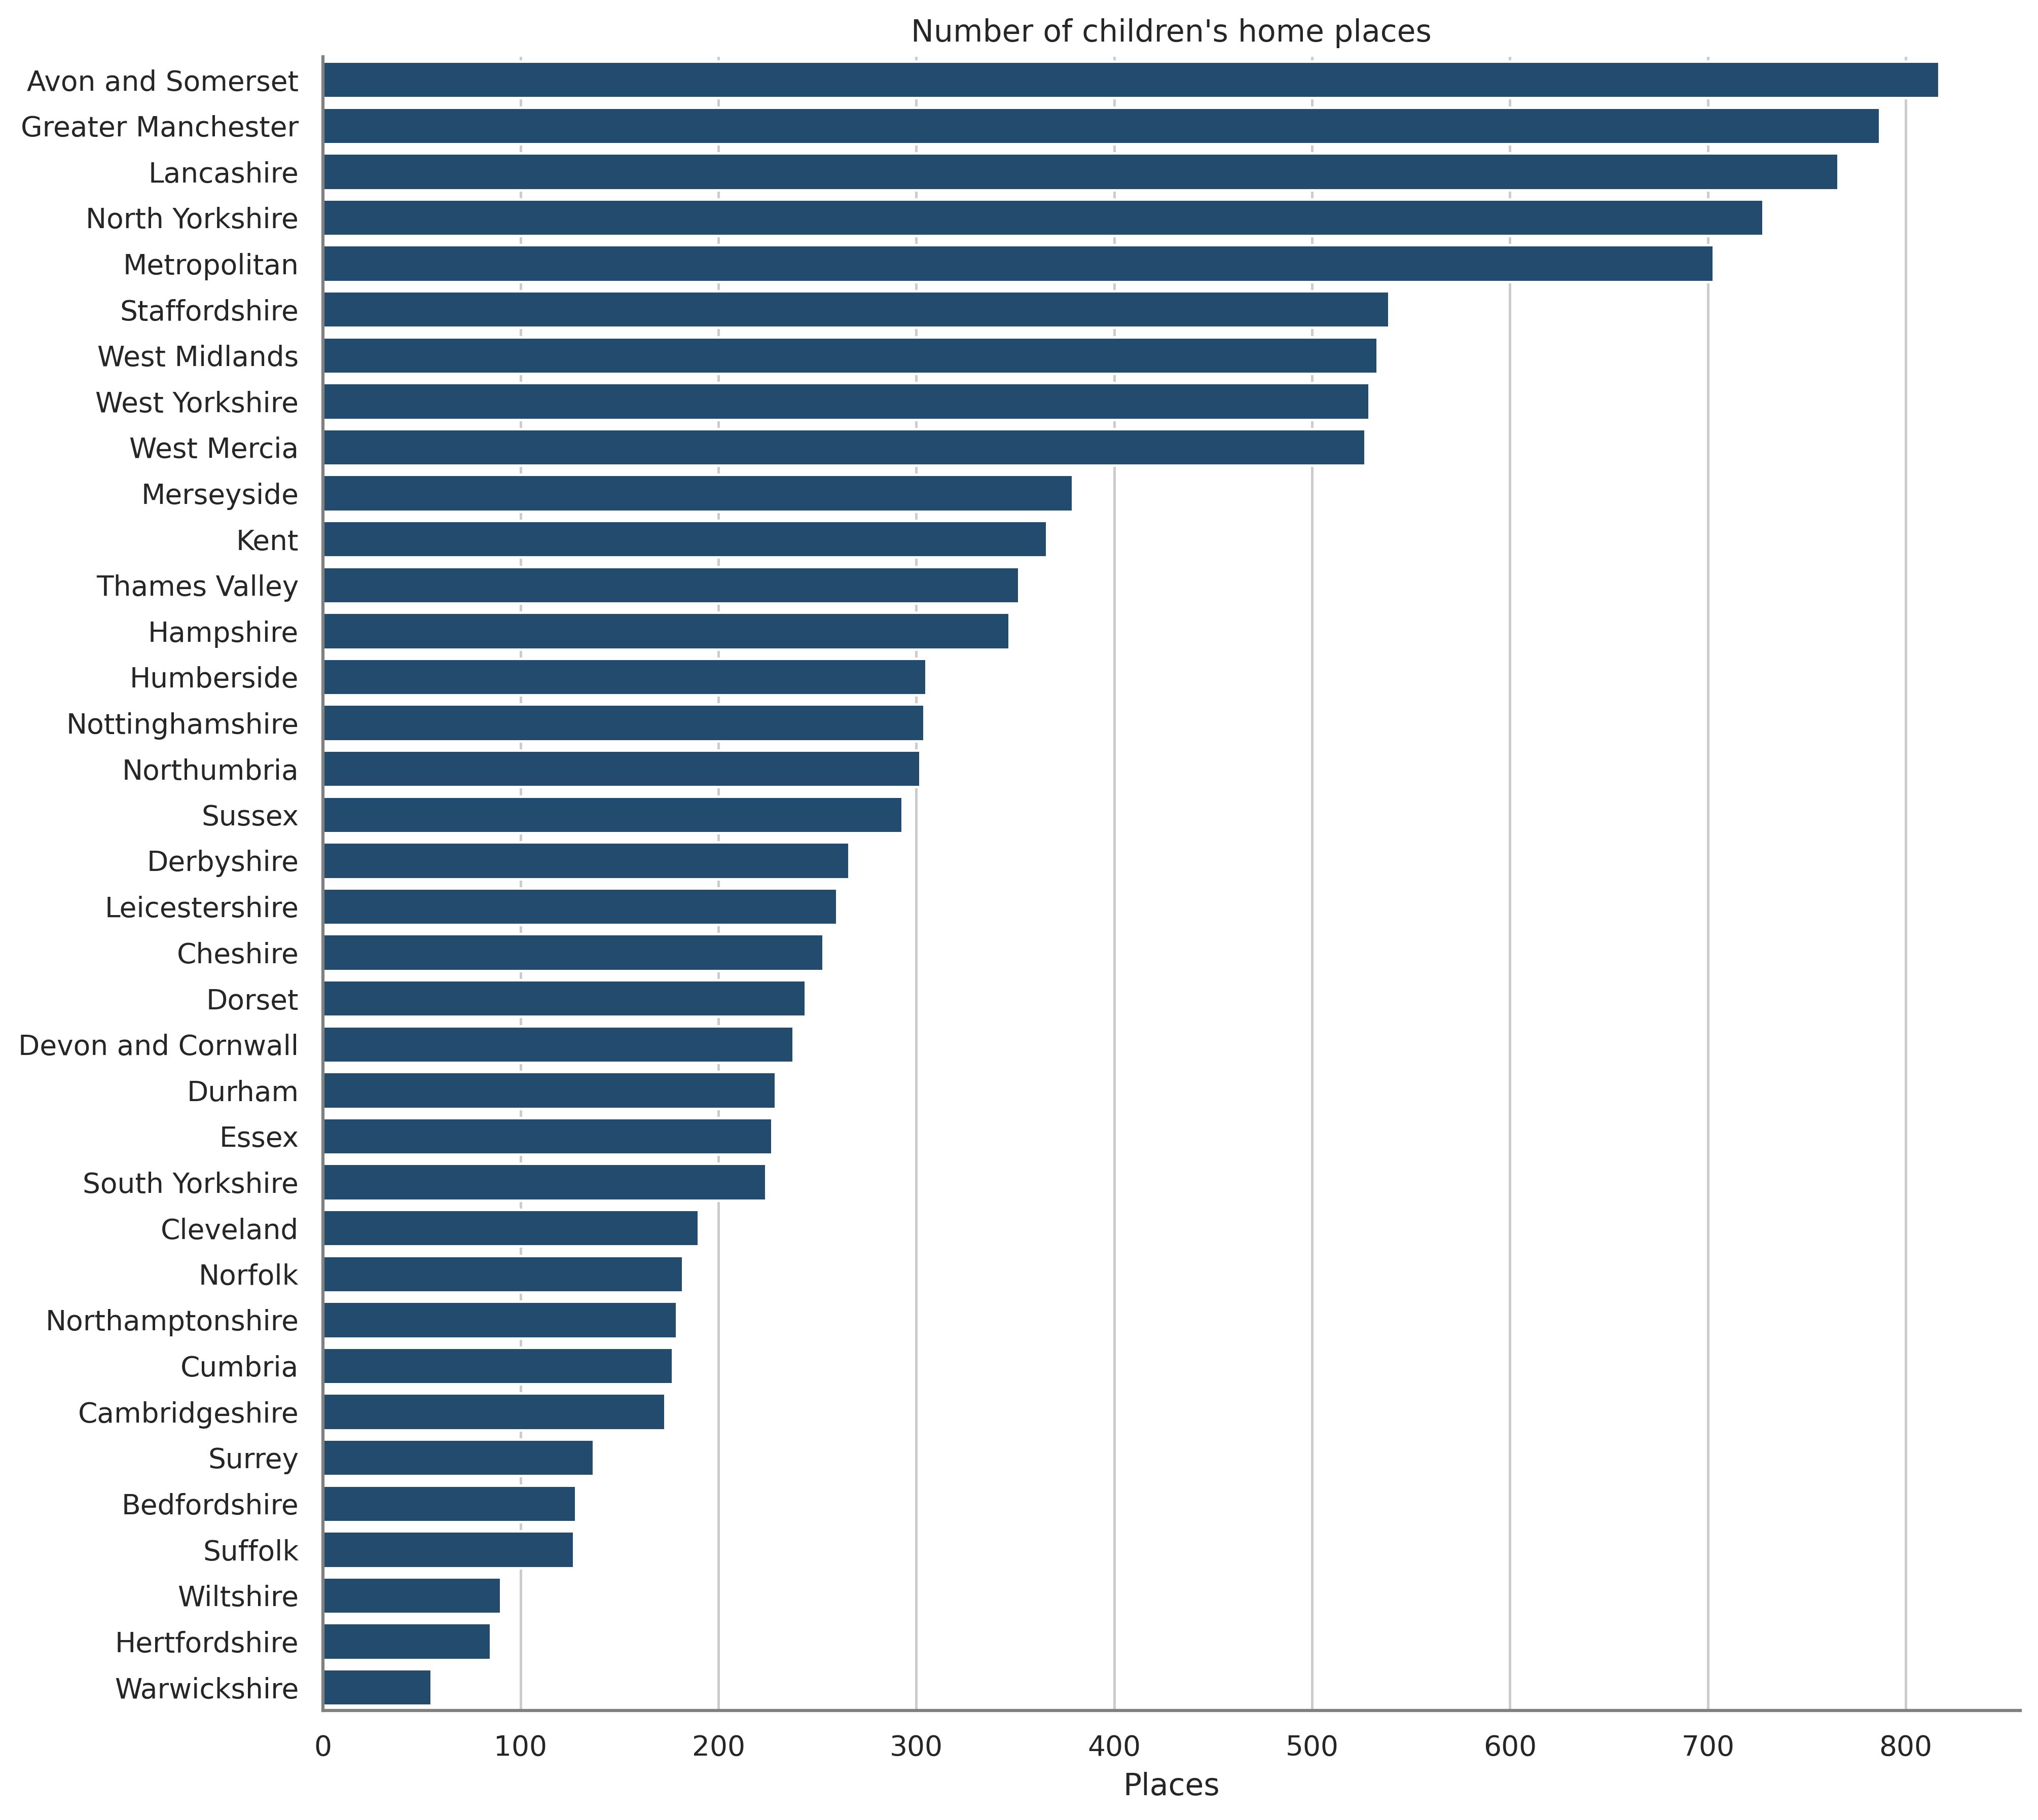

In [20]:
# childrens home PLACES per force
homes_places = pd.DataFrame(homes.groupby('police_force')['Places'].sum()).reset_index()
homes_places = homes_places.sort_values(by='Places', ascending=False)

fig, ax = plt.subplots(figsize=(12,12), dpi=360)
sns.barplot(data=homes_places,
            y='police_force',
            x='Places',
            color=plot_colour)
plt.ylabel('')
plt.title("Number of children's home places")
sns.despine();

plot_title = "Number childrens home places"
plt.savefig(plot_title,
            bbox_inches = "tight");

In [21]:
# Number of private childrens home owners per force
homes_priv_owners = homes.loc[homes['Sector']=='Private', ['police_force',
                                                           'Organisation which owns the provider']]
homes_priv_owners = pd.DataFrame(homes_priv_owners\
                                 .groupby('police_force')\
                                 ['Organisation which owns the provider']\
                                 .size()).reset_index()
homes_priv_owners = homes_priv_owners.sort_values(by='Organisation which owns the provider',
                                                  ascending=False)
homes_priv_owners.columns=['police_force', 'num_private_providers']
homes_priv_owners

police_force  num_private_providers
0    Avon and Somerset                    201
16          Lancashire                    191
11  Greater Manchester                    163
26       Staffordshire                    142
32         West Mercia                    129
33       West Midlands                    120
21     North Yorkshire                    120
19        Metropolitan                    105
18          Merseyside                    101
34      West Yorkshire                     88
7   Devon and Cornwall                     72
3             Cheshire                     67
15                Kent                     63
24     Nottinghamshire                     58
17      Leicestershire                     58
12           Hampshire                     55
8               Dorset                     54
30       Thames Valley                     47
10               Essex                     47
29              Sussex                     45
6           Derbyshire                     44
25     South Yorkshire                     40
22    Northamptonshire                     39
14          Humberside                     38
9               Durham                     35
5              Cumbria                     32
4            Cleveland                     27
23         Northumbria                     26
2       Cambridgeshire                     26
1         Bedfordshire                     23
35           Wiltshire                     21
27             Suffolk                     20
20             Norfolk                     19
31        Warwickshire                     10
13       Hertfordshire                      8
28              Surrey                      5

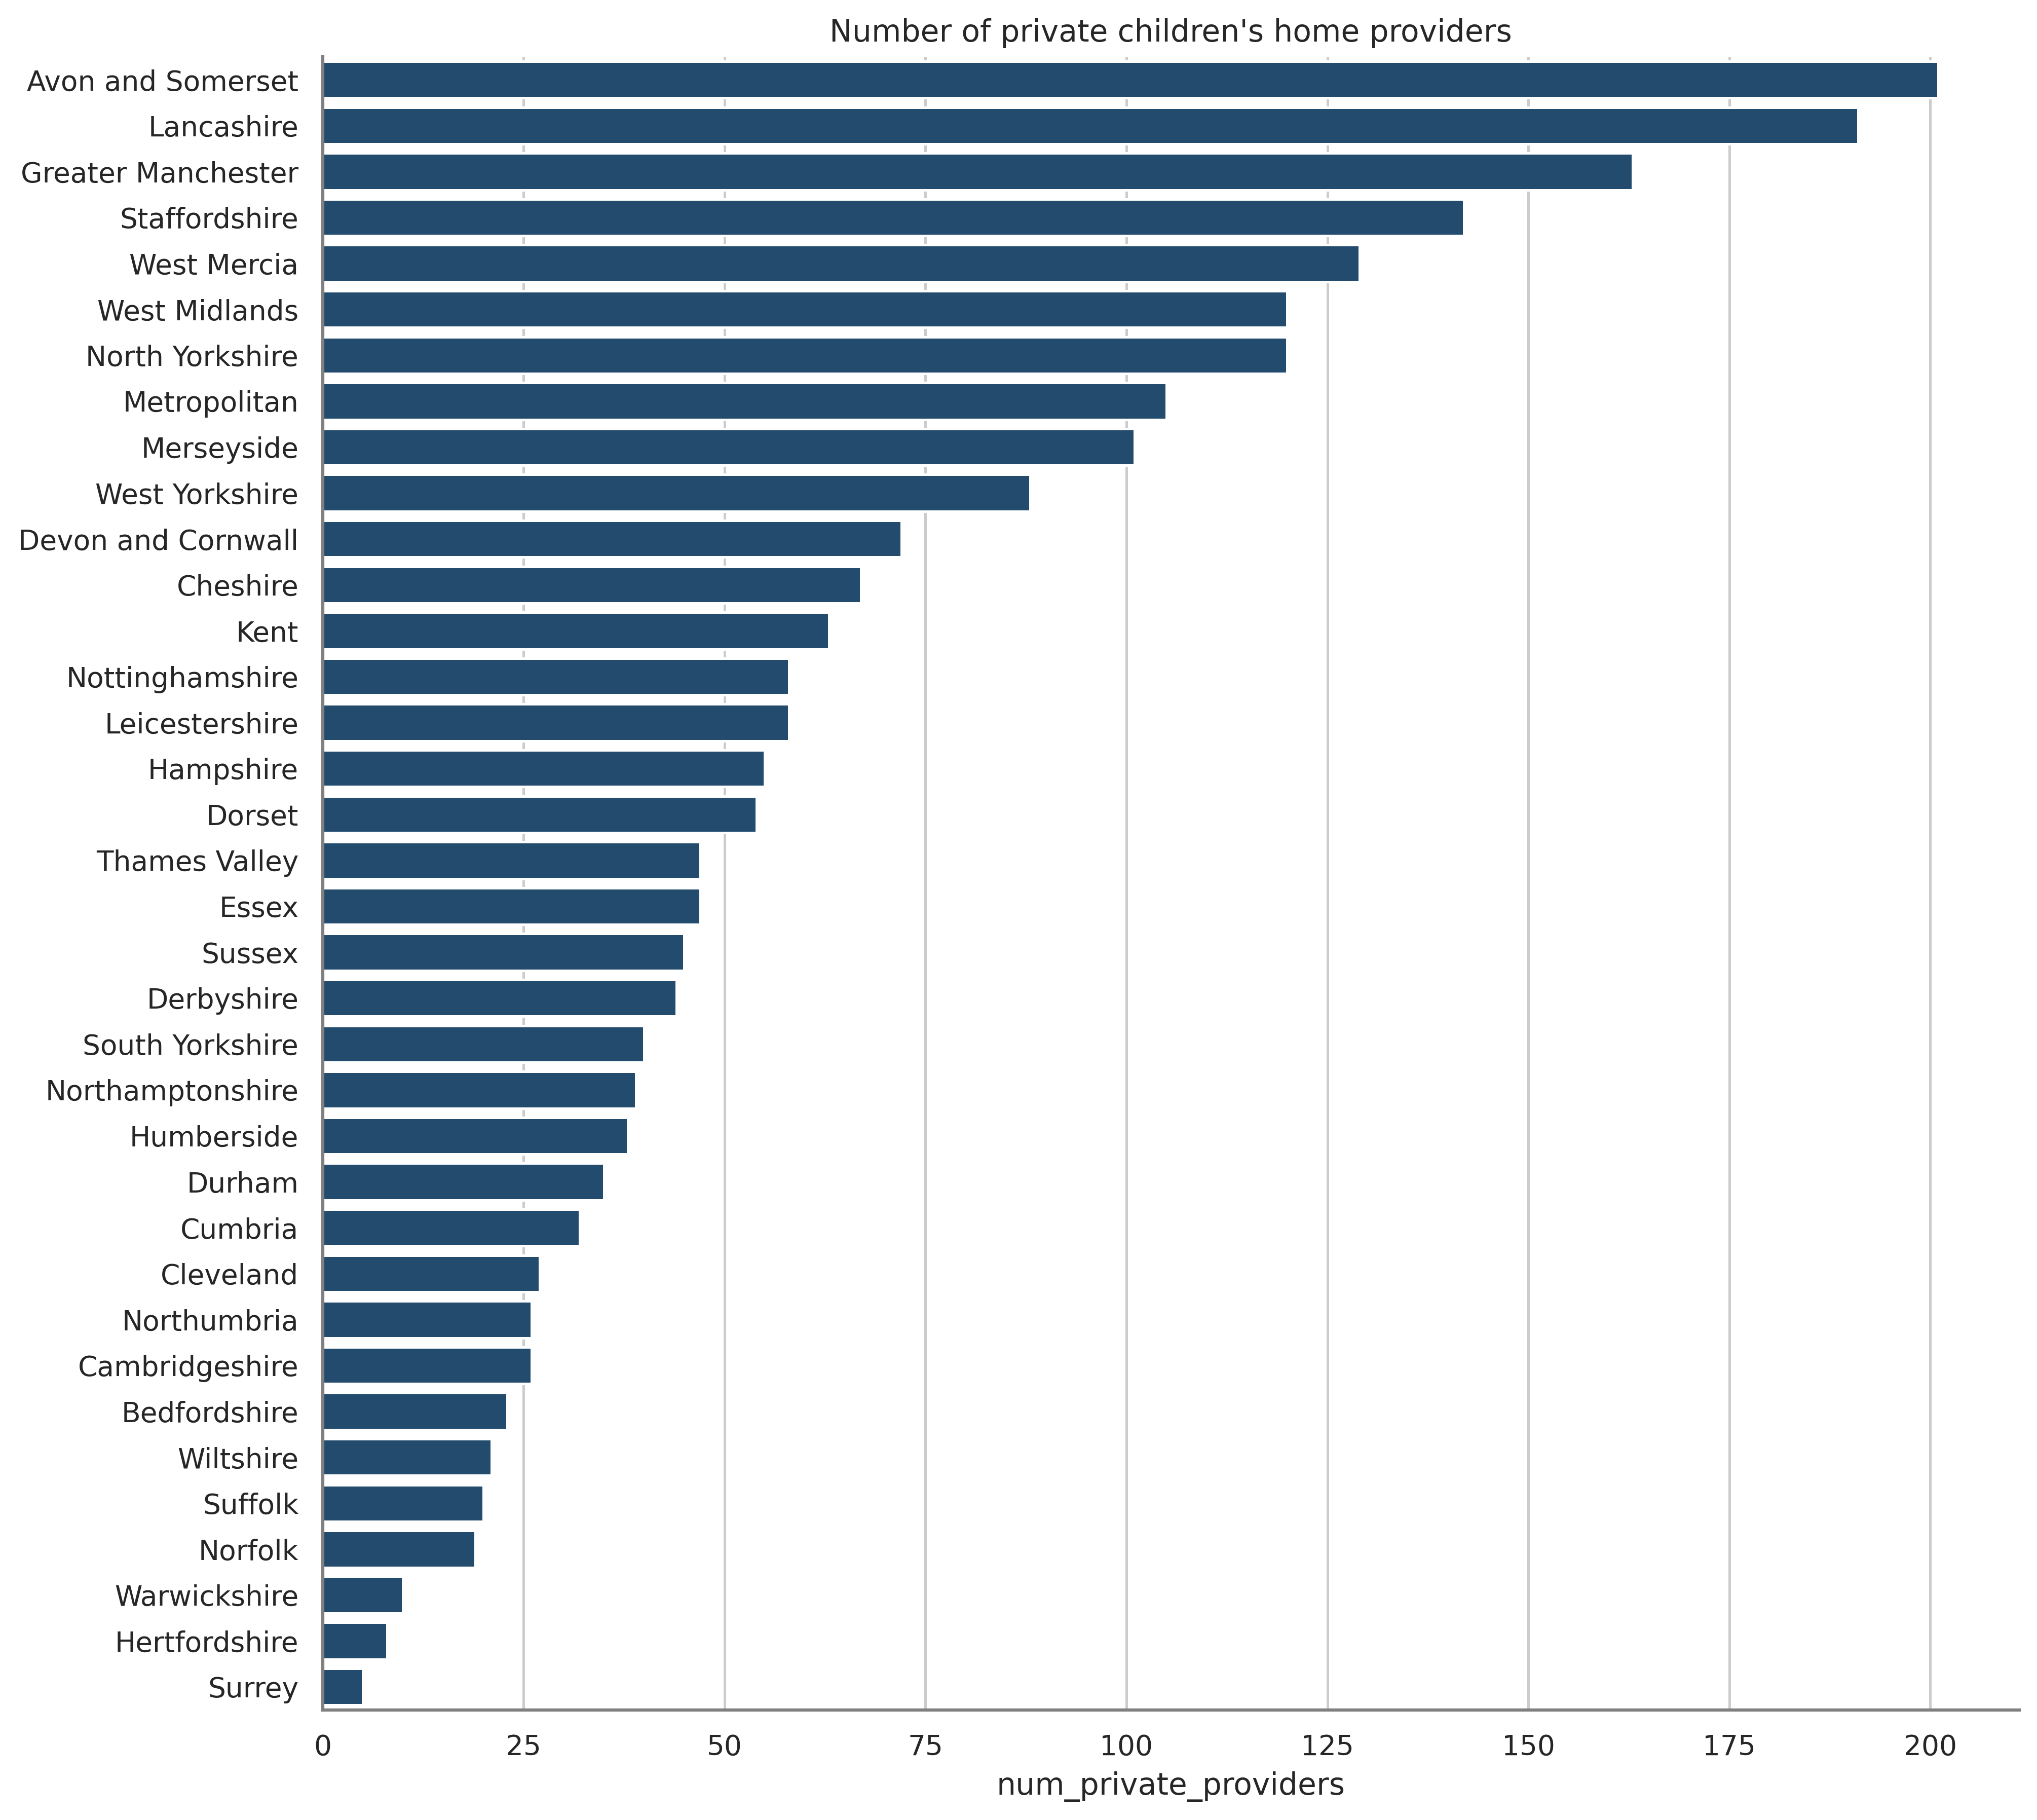

In [22]:
fig, ax = plt.subplots(figsize=(12,12), dpi=360)
sns.barplot(data=homes_priv_owners,
            y='police_force',
            x='num_private_providers',
            color=plot_colour)
plt.ylabel('')
plt.title("Number of private children's home providers")
sns.despine();

plot_title = "Private childrens home providers"
plt.savefig(plot_title,
            bbox_inches = "tight");

## Children missing from care / not care

In [23]:
care_summary = missing[['police_force',
                        'care_child_incident_ratio',
                        'not_care_child_incident_ratio',
                        'care_num_child_incidents',
                        'not_care_num_child_incidents',
                        'care_num_missing_children',
                        'not_care_num_missing_children',
                        'care_plus_not_care_child_ttl',
                        'percent_care_children']]

care_summary = care_summary.merge(homes_sectors, left_on='police_force',
                                  right_on='police_force', how='outer')

care_summary = care_summary.merge(homes_places, left_on='police_force',
                                  right_on='police_force', how='outer')

care_summary.to_csv('care_summary.csv', index=False)

In [24]:
care_summary.head(3)

police_force  care_child_incident_ratio  \
0  Avon and Somerset                        3.7   
1       Bedfordshire                        6.6   
2     Cambridgeshire                        5.0   

   not_care_child_incident_ratio  care_num_child_incidents  \
0                            2.0                     936.0   
1                            2.2                     474.0   
2                            2.4                     239.0   

   not_care_num_child_incidents  care_num_missing_children  \
0                        1861.0                      256.0   
1                        1241.0                       72.0   
2                        1562.0                       48.0   

   not_care_num_missing_children  care_plus_not_care_child_ttl  \
0                          909.0                        1165.0   
1                          553.0                         625.0   
2                          664.0                         712.0   

   percent_care_children  Health Authority  Local Authority  Private  \
0                  21.97               0.0             24.0    201.0   
1                  11.52               0.0              6.0     23.0   
2                   6.74               0.0              4.0     26.0   

   Voluntary  total_homes  Places  
0        3.0        228.0   817.0  
1        1.0         30.0   128.0  
2        3.0         33.0   173.0

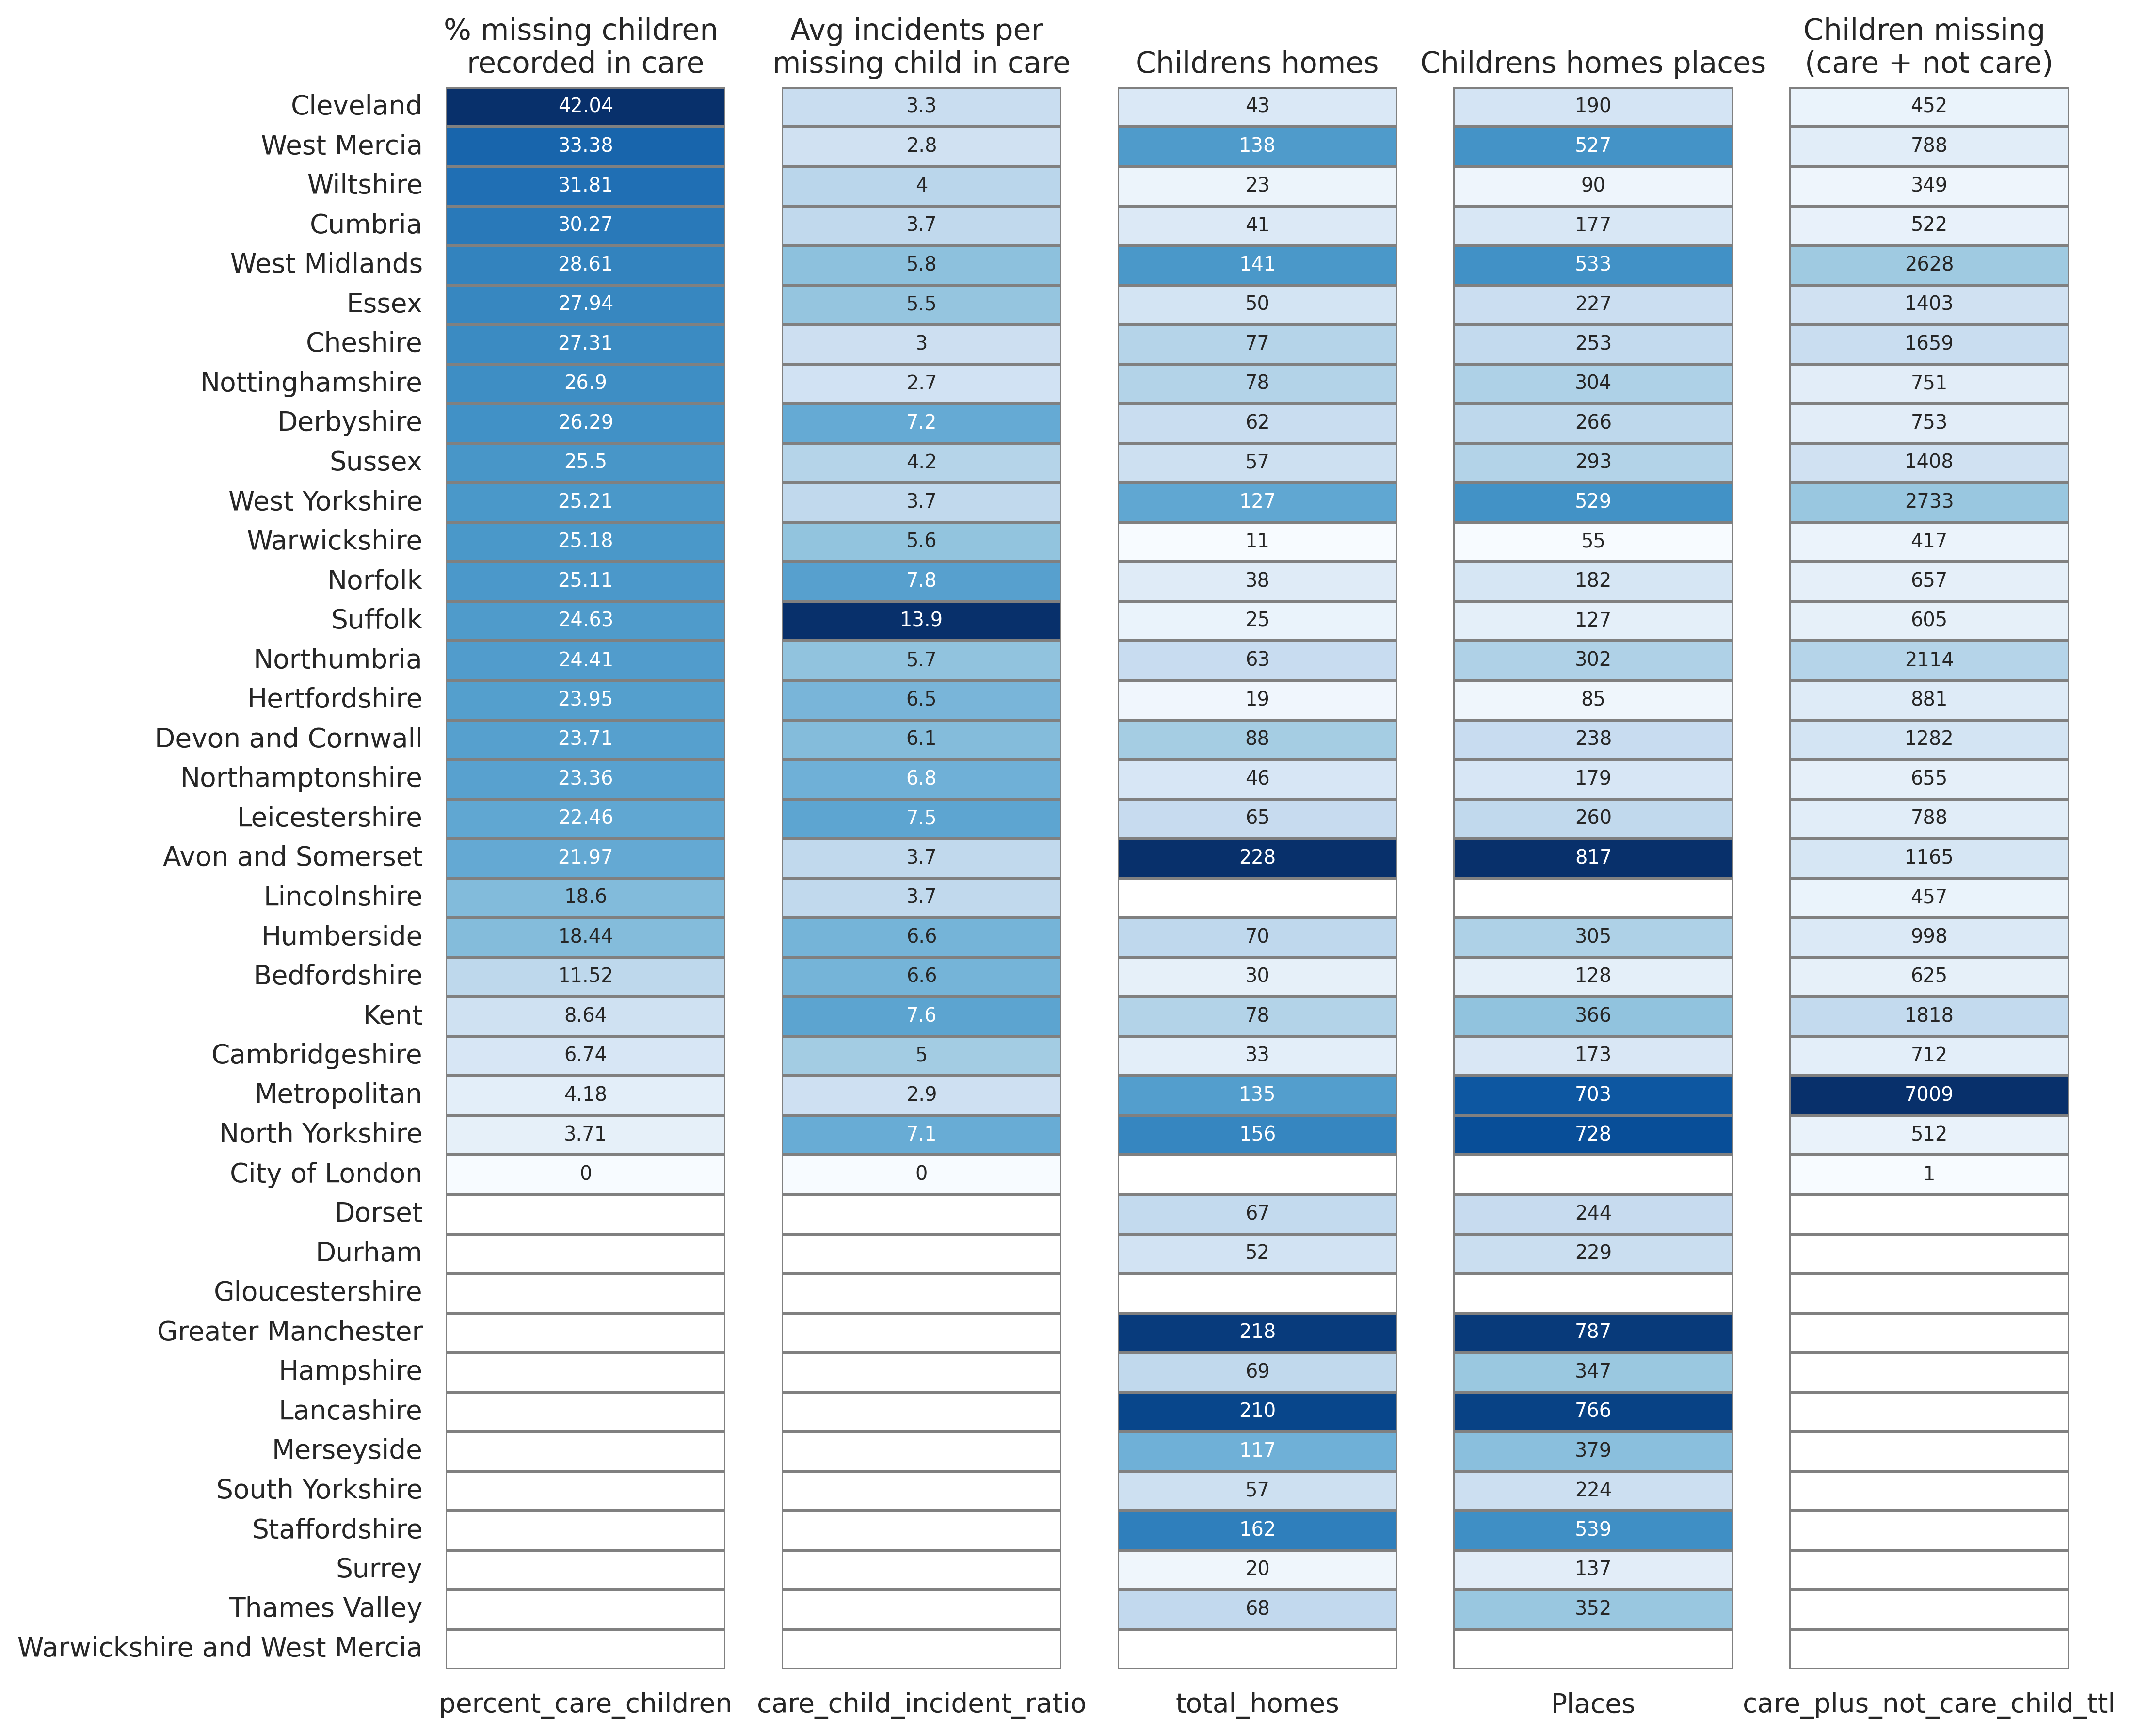

In [25]:
# Heatmaps side-by-side showing:
##  - % care
##  - care ratio
##  - num homes
##  - num home places
##  - ttl children missing (care plus not care) - number
## sorted by % in care
care_summary = care_summary.sort_values(by='percent_care_children', ascending=False)
pc_care_heatmap = care_summary[['police_force', 'percent_care_children']].set_index('police_force')
care_ratio_heatmap = care_summary[['police_force', 'care_child_incident_ratio']].set_index('police_force')
ttl_homes_heatmap = care_summary[['police_force', 'total_homes']].set_index('police_force')
places_heatmap = care_summary[['police_force', 'Places']].set_index('police_force')
children_heatmap = care_summary[['police_force', 'care_plus_not_care_child_ttl']].set_index('police_force')


fig, ax = plt.subplots(figsize=(12,12), dpi=360, ncols=5, sharey=True)

sns.heatmap(pc_care_heatmap, 
            annot=True, 
            fmt="g", 
            cmap='Blues',
            linewidths=1, 
            linecolor='grey',
            cbar=False,
            annot_kws={'size':8},
            ax=ax[0])

ax[0].set_ylabel('')
ax[0].set_title('% missing children \nrecorded in care')

sns.heatmap(care_ratio_heatmap, 
            annot=True, 
            fmt="g", 
            cmap='Blues',
            linewidths=1, 
            linecolor='grey',
            cbar=False,
            annot_kws={'size':8},
            ax=ax[1])

ax[1].set_ylabel('')
ax[1].set_title('Avg incidents per \nmissing child in care')

sns.heatmap(ttl_homes_heatmap, 
            annot=True, 
            fmt="g", 
            cmap='Blues',
            linewidths=1, 
            linecolor='grey',
            cbar=False,
            annot_kws={'size':8},
            ax=ax[2])

ax[2].set_ylabel('')
ax[2].set_title('Childrens homes')

sns.heatmap(places_heatmap, 
            annot=True, 
            fmt="g", 
            cmap='Blues',
            linewidths=1, 
            linecolor='grey',
            cbar=False,
            annot_kws={'size':8},
            ax=ax[3])

ax[3].set_ylabel('')
ax[3].set_title('Childrens homes places')

sns.heatmap(children_heatmap, 
            annot=True, 
            fmt="g", 
            cmap='Blues',
            linewidths=1, 
            linecolor='grey',
            cbar=False,
            annot_kws={'size':8},
            ax=ax[4])

ax[4].set_ylabel('')
ax[4].set_title('Children missing \n(care + not care)');

plot_title = "Care Summary Heatmaps"
plt.savefig(plot_title,
            bbox_inches = "tight");
